# Predict the loan sanction Amount

Buying a house requires a lot of careful planning. Once you have finalized your budget and the house that you want to buy, you must ensure that you have sufficient funds to pay the seller.

With rising property rates, most people avail home loans to buy their dream houses. The bank only lends up to 80%  of the total amount based on a person's finances (salary, outgoing expenses, existing loans, etc.). You will need to make the rest of the payment yourself after the bank tells you how much they can lend.

## Task

You work for XYZ bank. Predict the loan amount that can be sanctioned to customers who have applied for a home loan using the features provided in the dataset.

## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df = pd.read_csv('/kaggle/input/sanction-loan/train.csv')

In [3]:
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [5]:
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091407e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [6]:
df.isnull().sum()*100/len(df)

Customer ID                     0.000000
Name                            0.000000
Gender                          0.176667
Age                             0.000000
Income (USD)                   15.253333
Income Stability                5.610000
Profession                      0.000000
Type of Employment             24.233333
Location                        0.000000
Loan Amount Request (USD)       0.000000
Current Loan Expenses (USD)     0.573333
Expense Type 1                  0.000000
Expense Type 2                  0.000000
Dependents                      8.310000
Credit Score                    5.676667
No. of Defaults                 0.000000
Has Active Credit Card          5.220000
Property ID                     0.000000
Property Age                   16.166667
Property Type                   0.000000
Property Location               1.186667
Co-Applicant                    0.000000
Property Price                  0.000000
Loan Sanction Amount (USD)      1.133333
dtype: float64

In [7]:
# Number of distinct values in variables
for i, column in enumerate(df.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(df[column].nunique()))

0. Customer Id: 30000
1. Name: 30000
2. Gender: 2
3. Age: 48
4. Income (Usd): 24429
5. Income Stability: 2
6. Profession: 8
7. Type Of Employment: 18
8. Location: 3
9. Loan Amount Request (Usd): 29982
10. Current Loan Expenses (Usd): 24041
11. Expense Type 1: 2
12. Expense Type 2: 2
13. Dependents: 10
14. Credit Score: 17586
15. No. Of Defaults: 2
16. Has Active Credit Card: 3
17. Property Id: 999
18. Property Age: 24179
19. Property Type: 4
20. Property Location: 3
21. Co-Applicant: 3
22. Property Price: 29632
23. Loan Sanction Amount (Usd): 21450


We will drop the row where loan sanction amount is null. As we do not have information about our target variable.

In [8]:
df = df[~(df["Loan Sanction Amount (USD)"].isnull()==True)]

In [9]:
df = df.reset_index(drop=True)

In [10]:
# We will drop the unique and identity columns 
df = df.drop(['Customer ID', 'Name'], axis = 1)

In [11]:
var_target = ['Loan Sanction Amount (USD)']

In [12]:
var_categorical = ['Gender', 'Income Stability', 'Profession', 'Type of Employment', 'Location',
                  'Expense Type 1', 'Expense Type 2', 'Dependents', 'No. of Defaults', 'Has Active Credit Card',
                  'Property Type', 'Property Location', 'Co-Applicant']
var_numerical = list(set(df.columns) - set(var_categorical) - set(var_target))

In [13]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      

# Exploratory Data Analysis

## Target Analysis

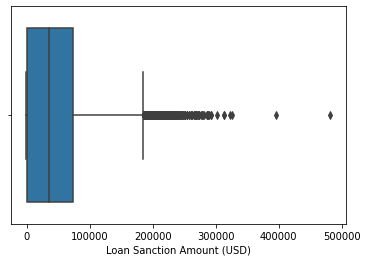

In [14]:
sns.boxplot(x = df["Loan Sanction Amount (USD)"])
plt.show()

In [15]:
len(df[df["Loan Sanction Amount (USD)"] == 0])

7865

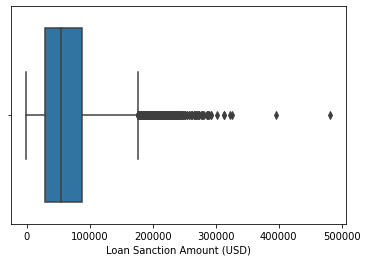

In [16]:
# Box plot to see the values of loan sactioned without 0 USD
target_variable_without_zero = df[~(df["Loan Sanction Amount (USD)"] == 0)]["Loan Sanction Amount (USD)"]
sns.boxplot(x = target_variable_without_zero)
plt.show()

Many values in the Loan Sanction Amount is zero. That means no amount of loan was sactioned to those customers.

## Categorical Variable

Gender


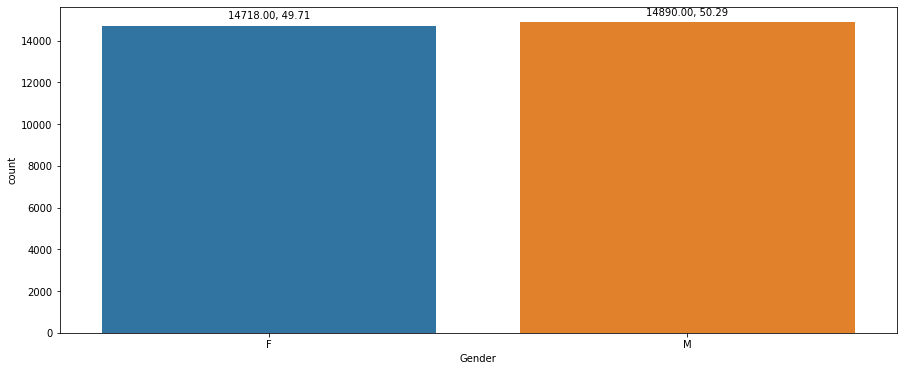

Income Stability


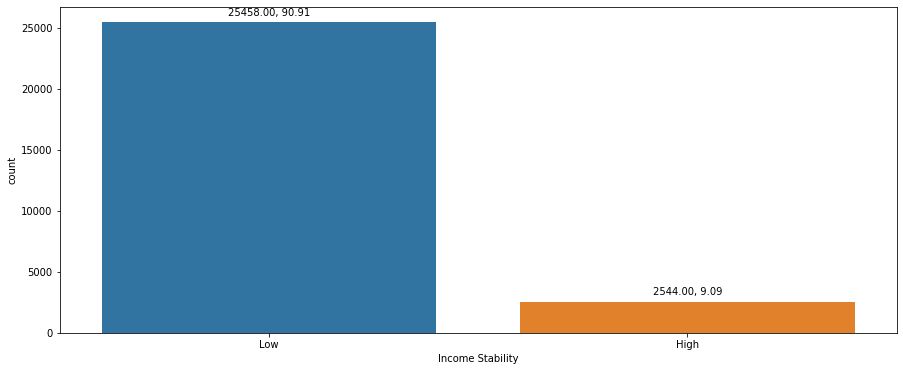

Profession


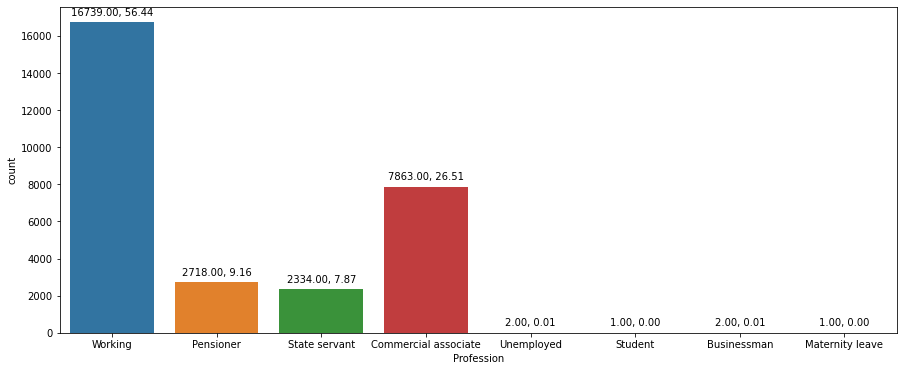

Type Of Employment


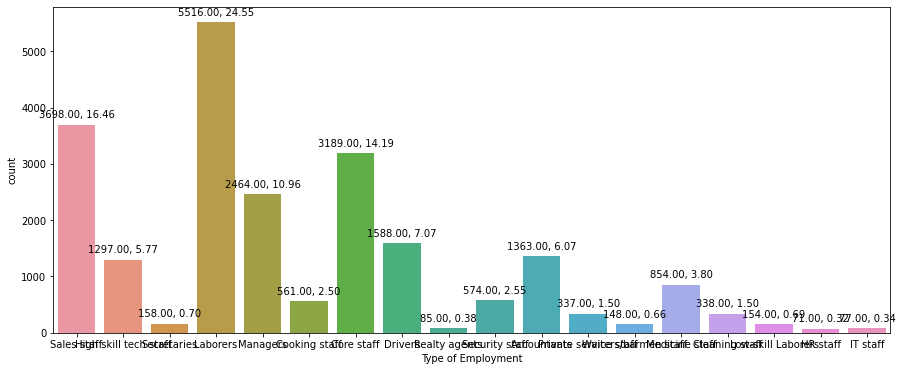

Location


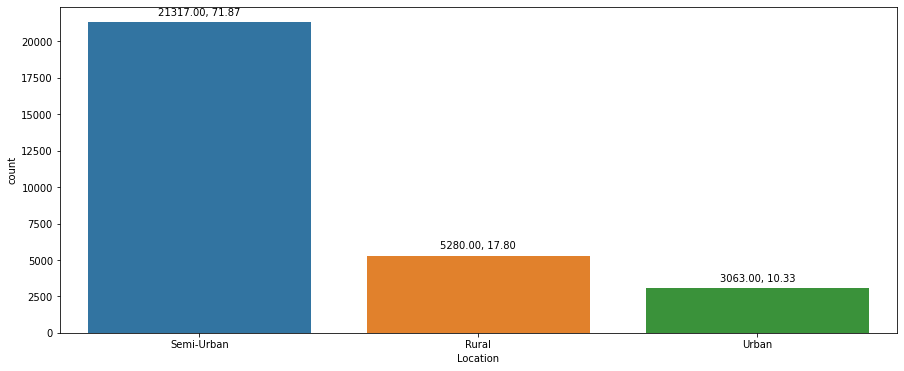

Expense Type 1


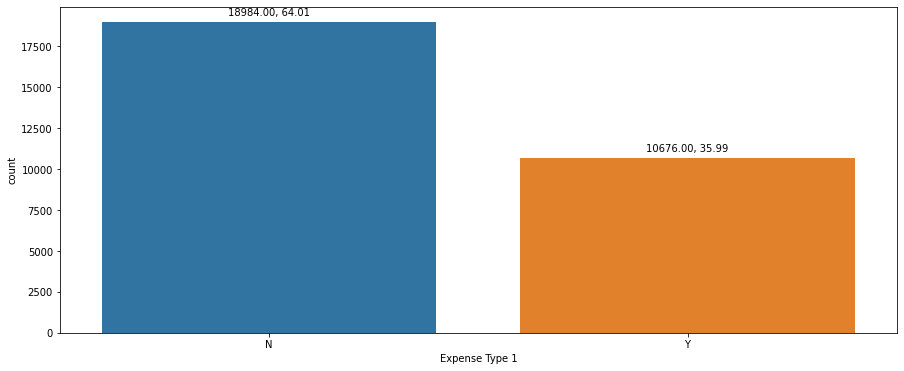

Expense Type 2


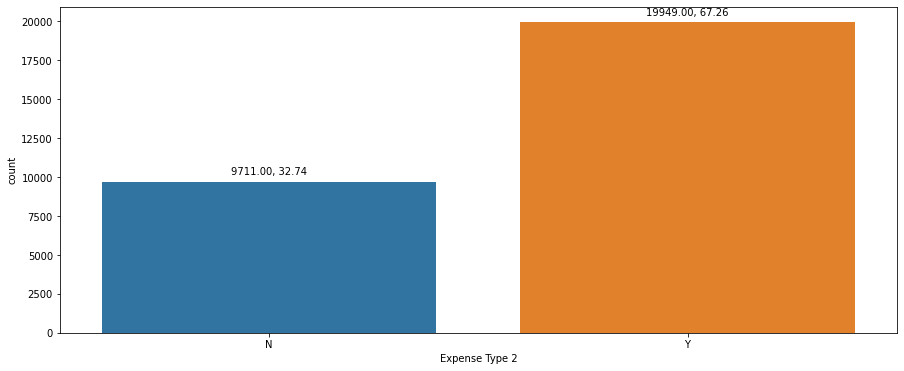

Dependents


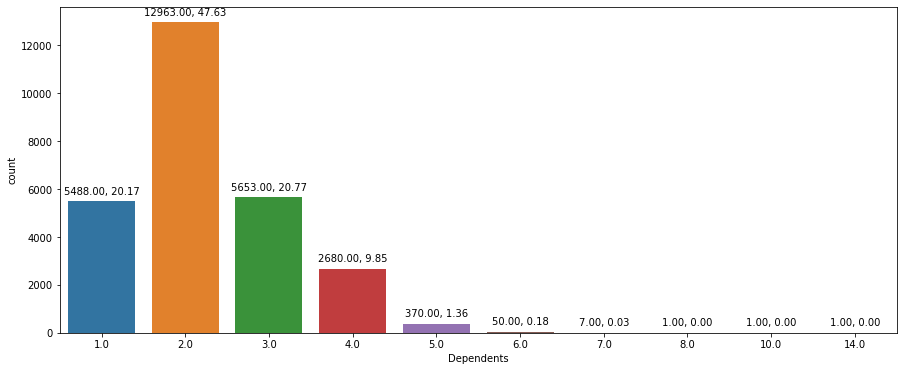

No. Of Defaults


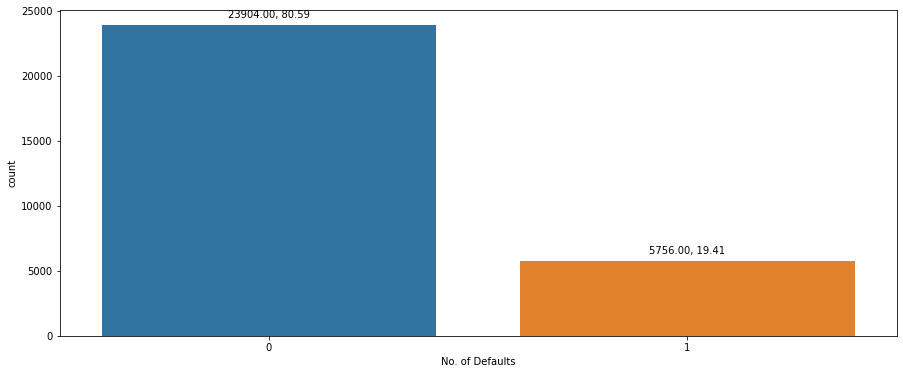

Has Active Credit Card


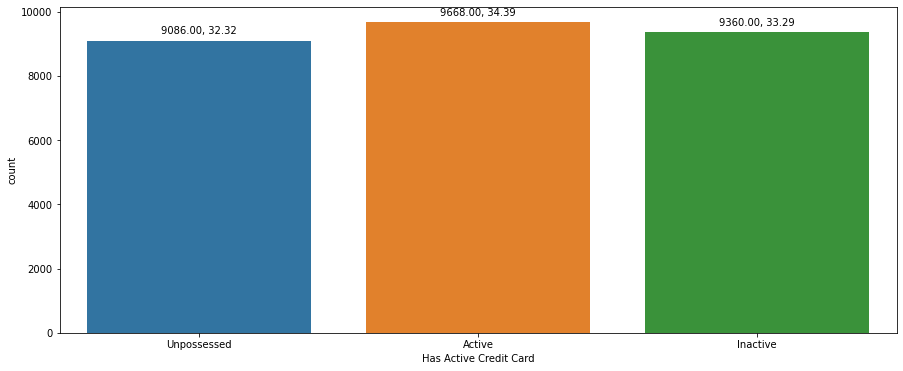

Property Type


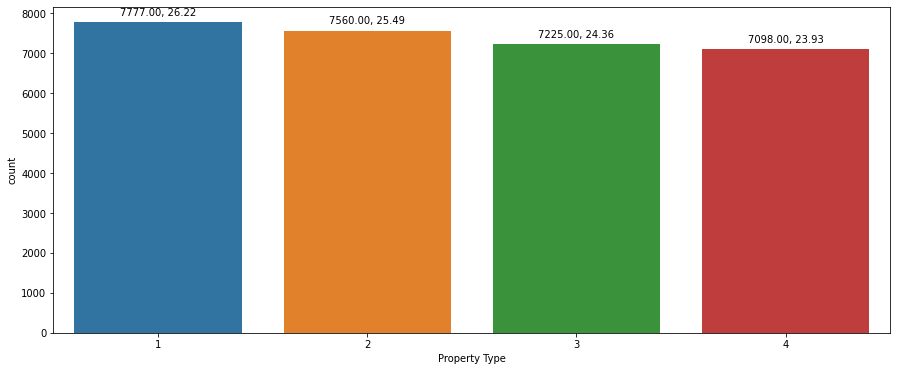

Property Location


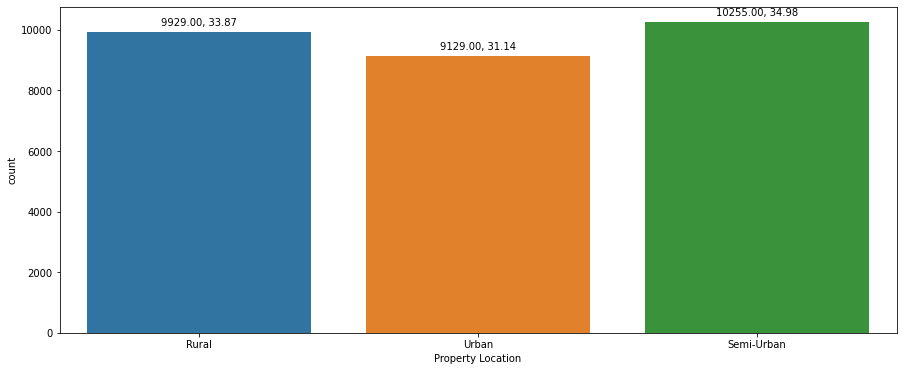

Co-Applicant


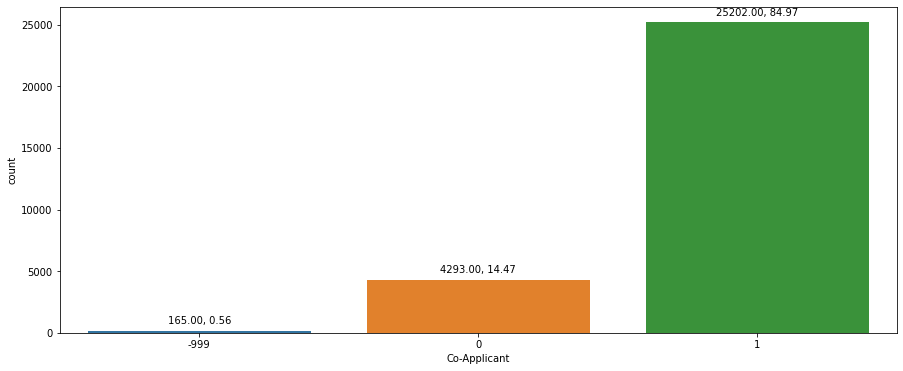

In [17]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df[column])
    label_values(ax)
    plt.show()

In [18]:
df["Type of Employment"].value_counts()

Laborers                 5516
Sales staff              3698
Core staff               3189
Managers                 2464
Drivers                  1588
Accountants              1363
High skill tech staff    1297
Medicine staff            854
Security staff            574
Cooking staff             561
Cleaning staff            338
Private service staff     337
Secretaries               158
Low-skill Laborers        154
Waiters/barmen staff      148
Realty agents              85
IT staff                   77
HR staff                   71
Name: Type of Employment, dtype: int64

Gender


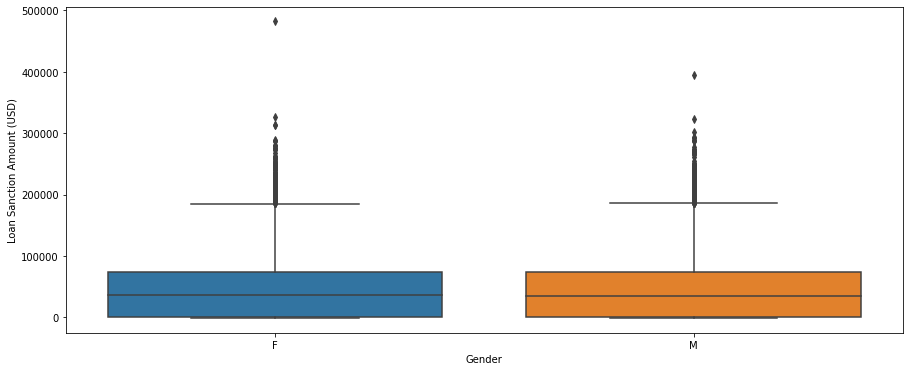

Income Stability


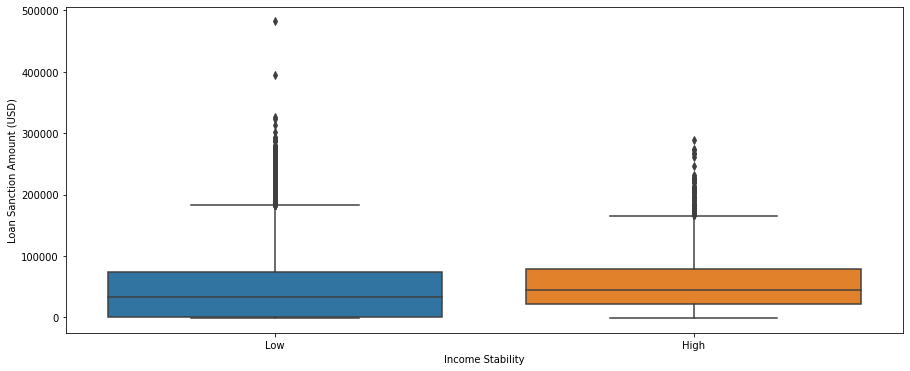

Profession


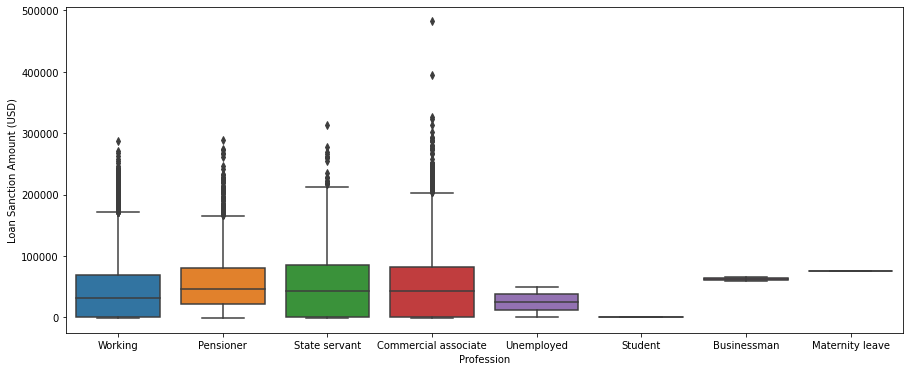

Type Of Employment


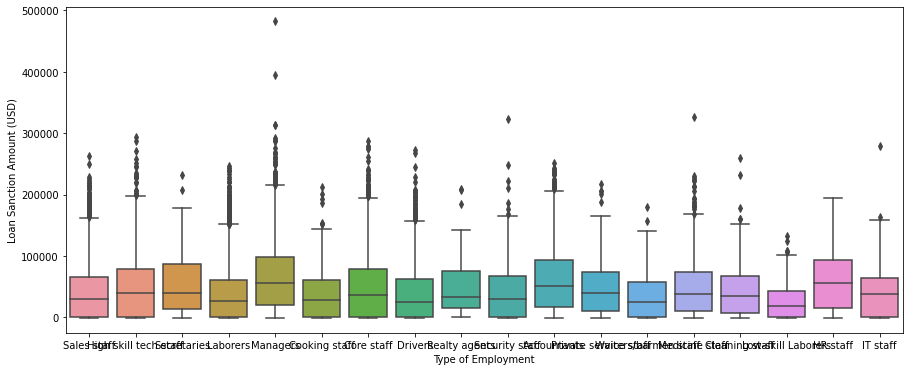

Location


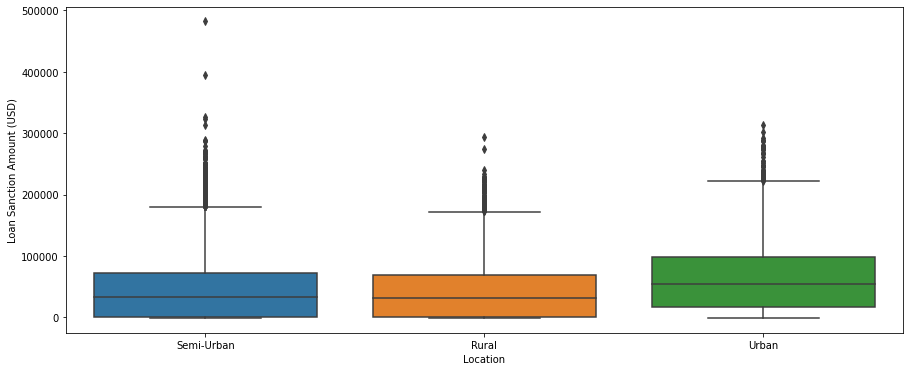

Expense Type 1


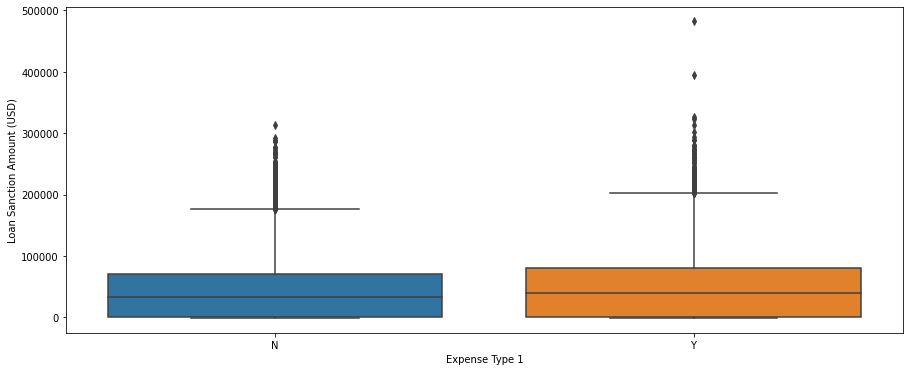

Expense Type 2


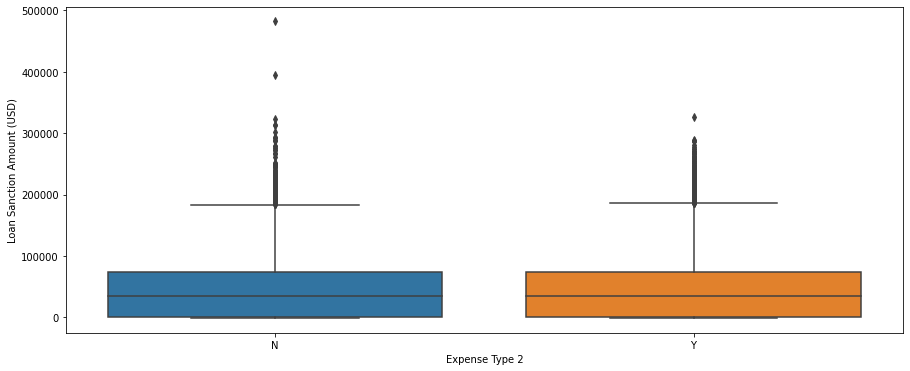

Dependents


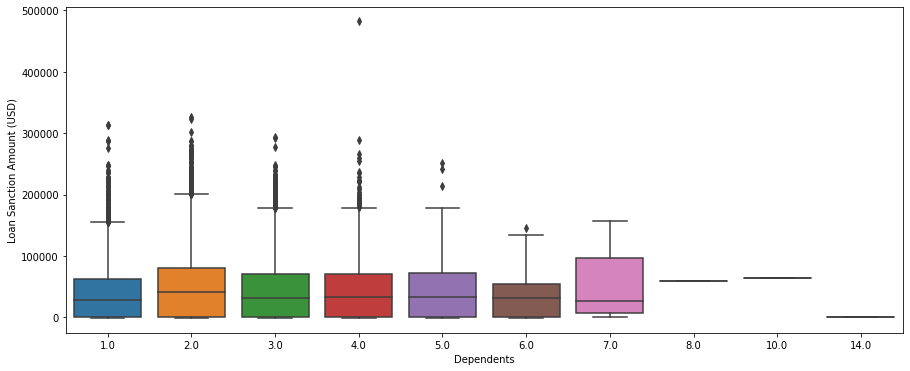

No. Of Defaults


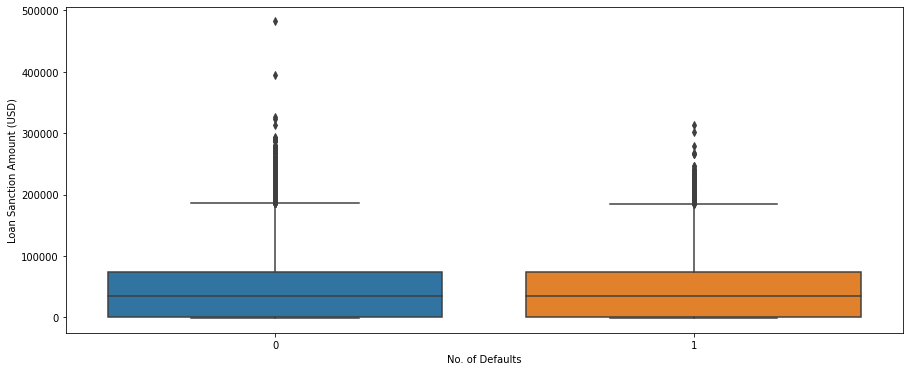

Has Active Credit Card


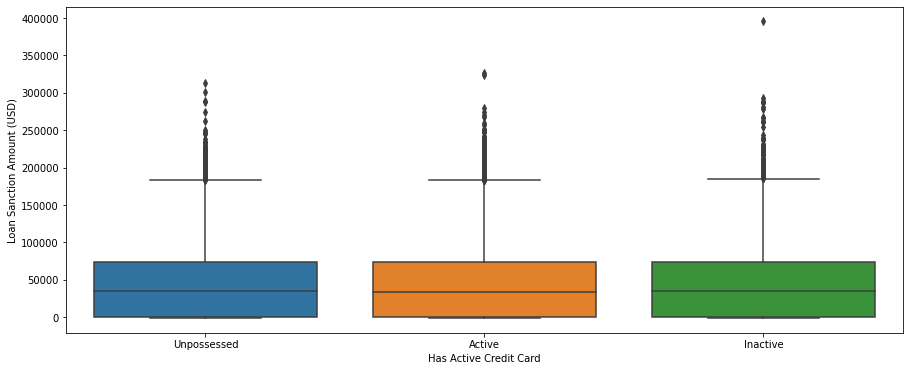

Property Type


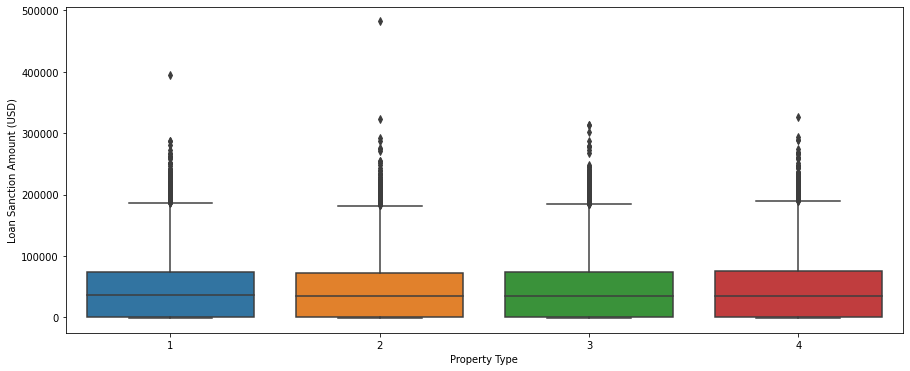

Property Location


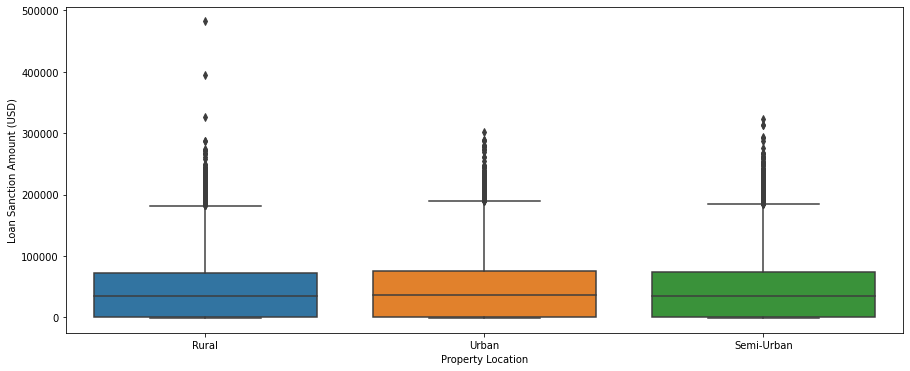

Co-Applicant


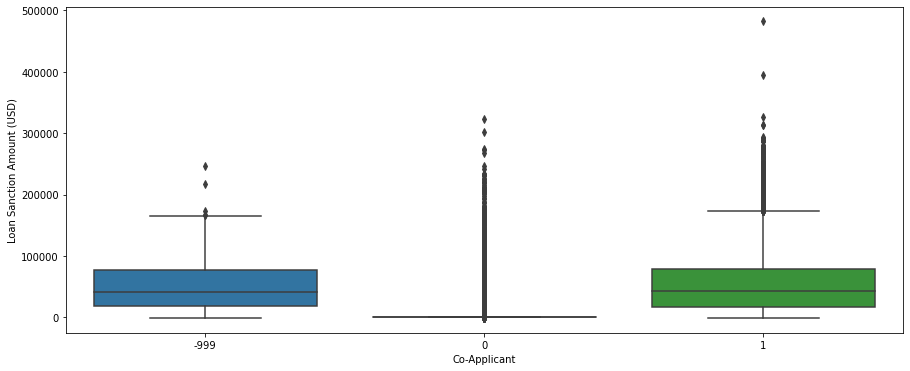

In [19]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.boxplot(x = df[column], y = df["Loan Sanction Amount (USD)"])
    label_values(ax)
    plt.show()

Gender


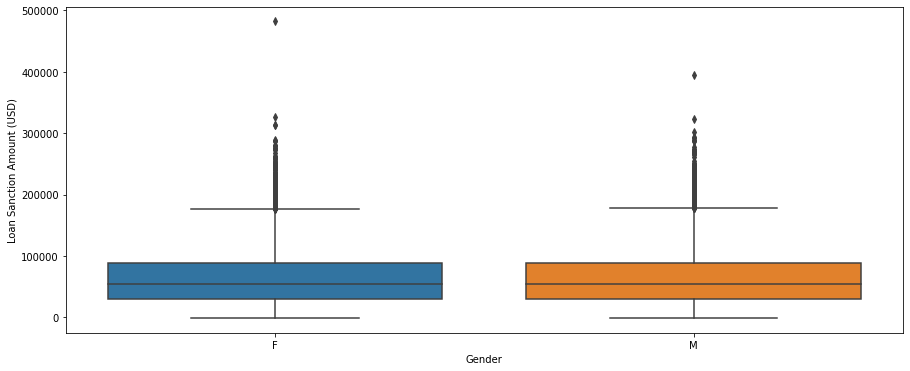

Income Stability


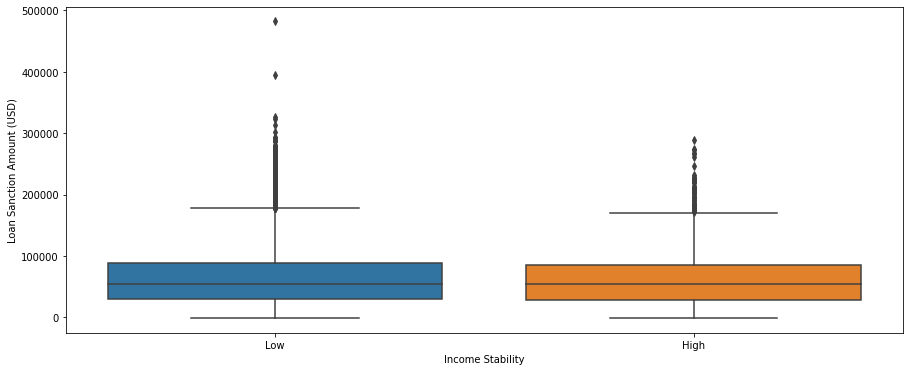

Profession


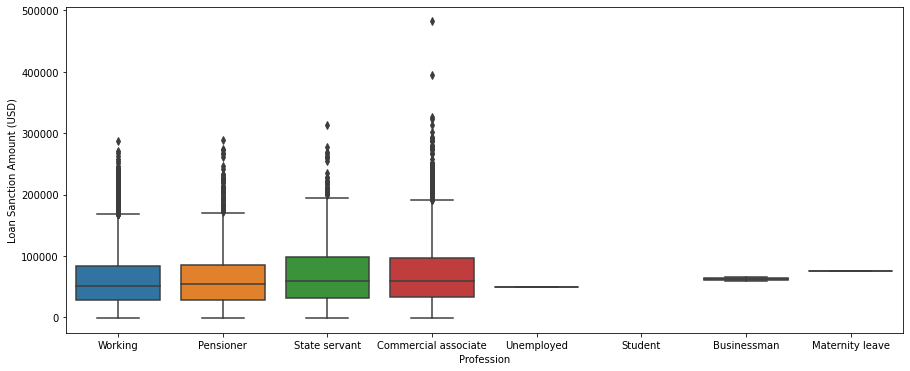

Type Of Employment


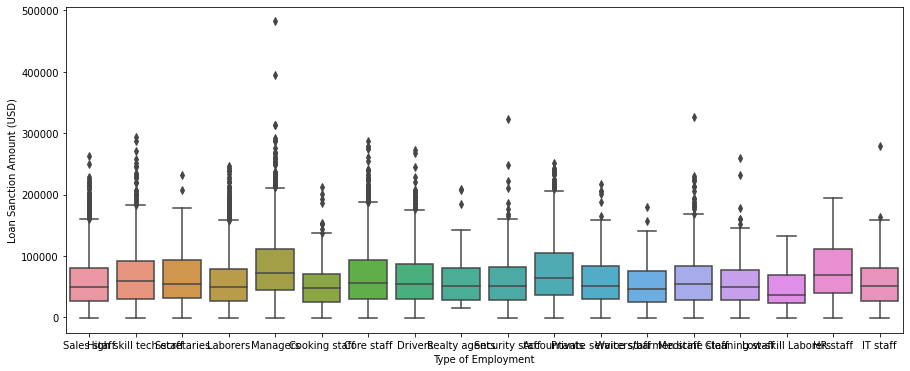

Location


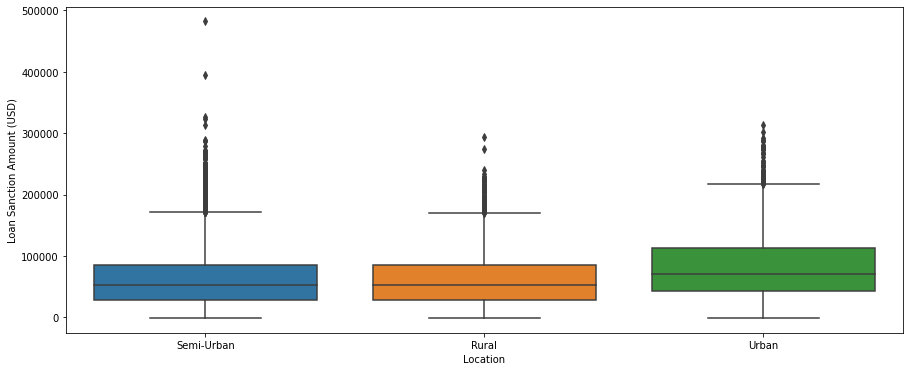

Expense Type 1


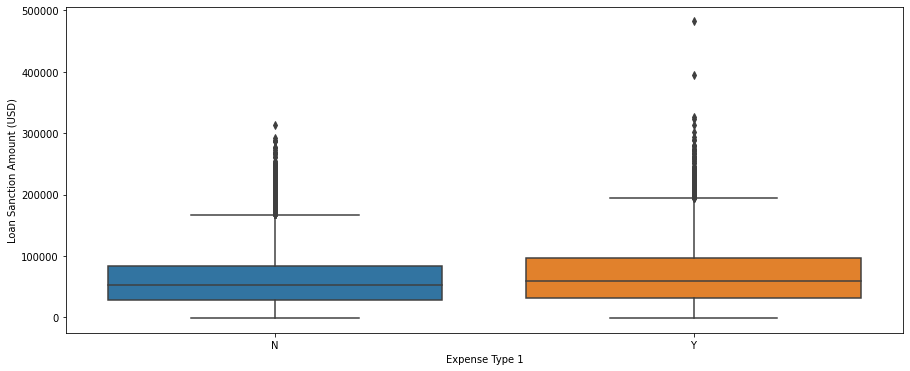

Expense Type 2


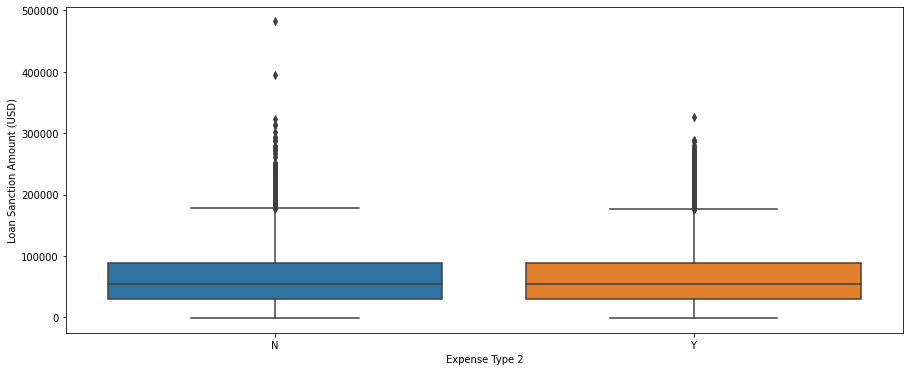

Dependents


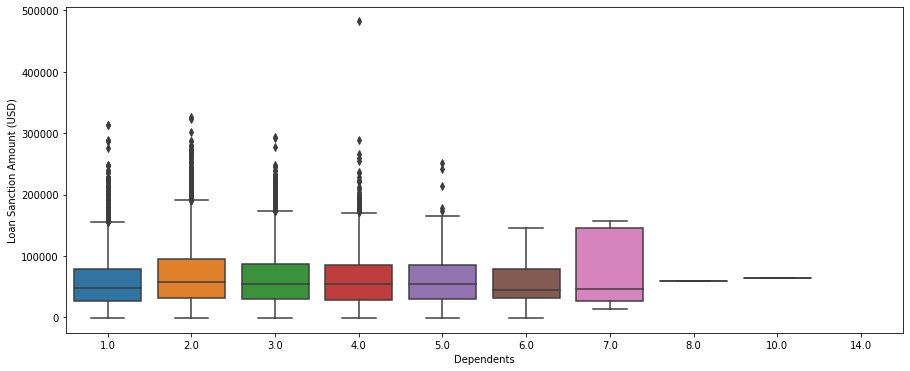

No. Of Defaults


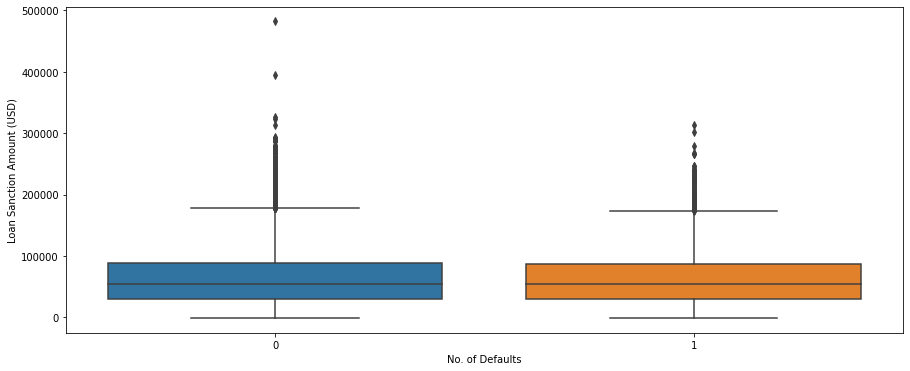

Has Active Credit Card


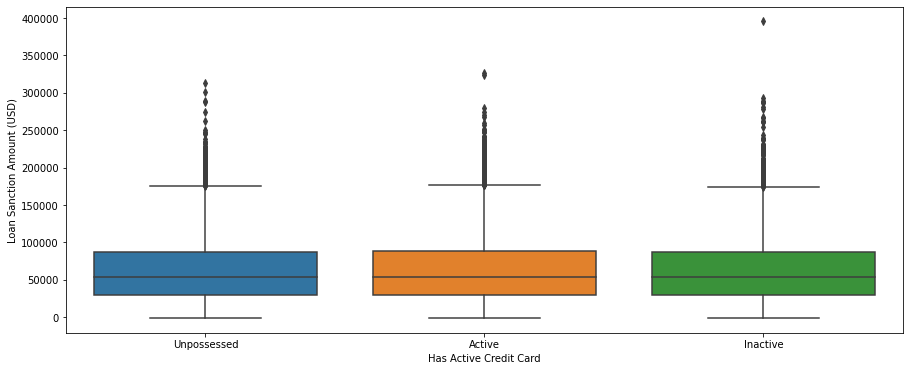

Property Type


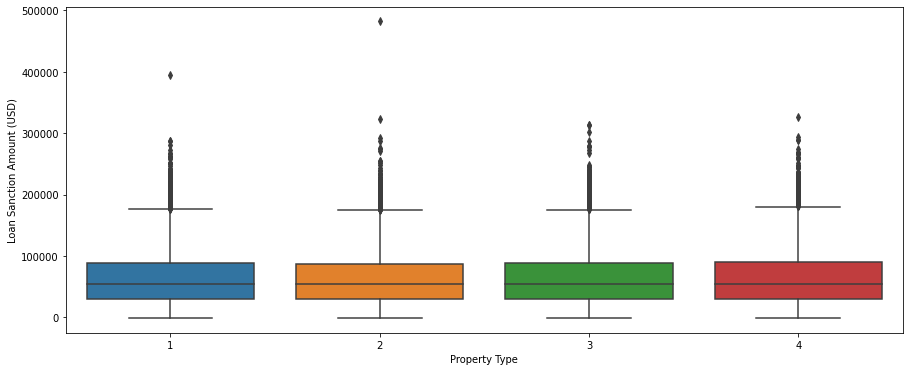

Property Location


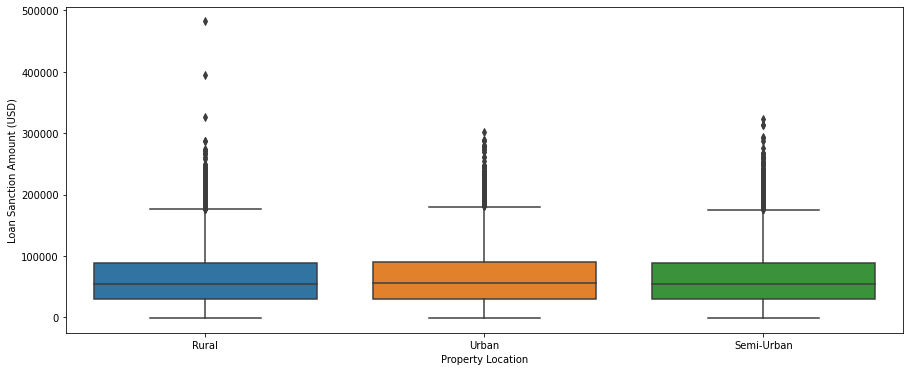

Co-Applicant


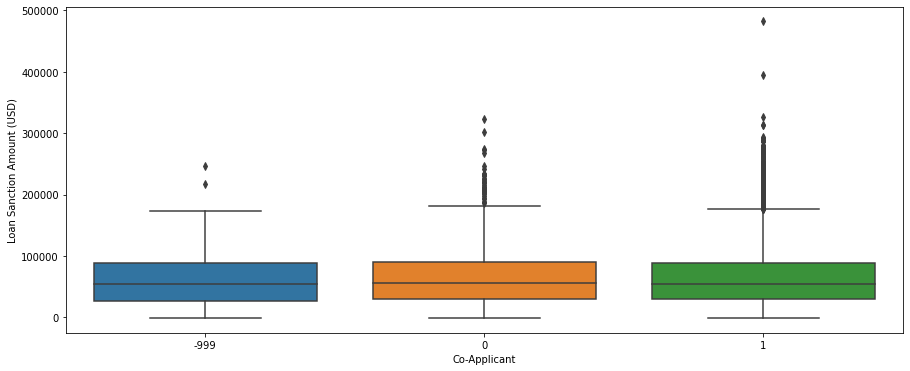

In [20]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.boxplot(x = df[column], y = target_variable_without_zero)
    label_values(ax)
    plt.show()

## Numerical Variables

Age


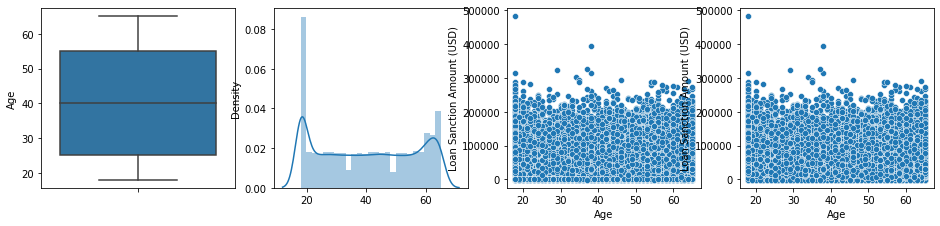

Property Age


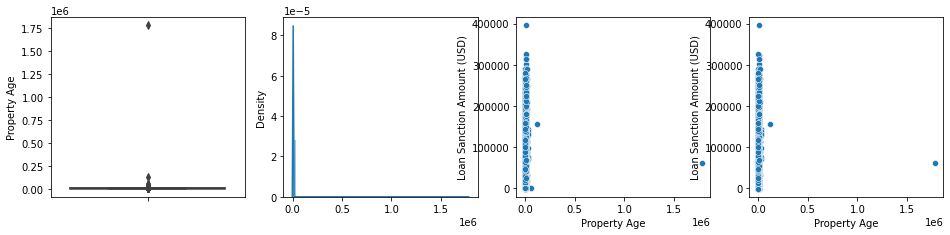

Credit Score


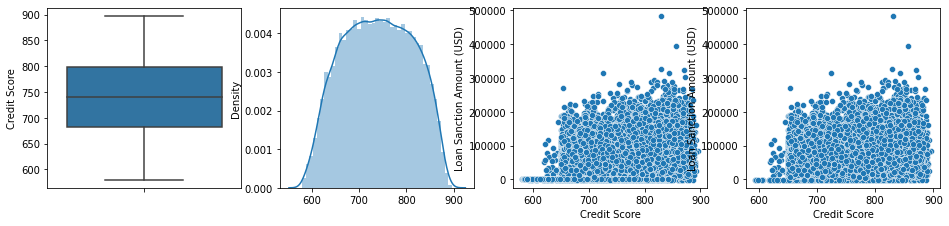

Current Loan Expenses (Usd)


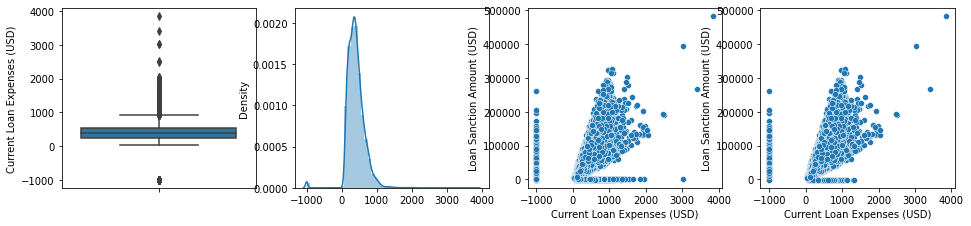

Property Id


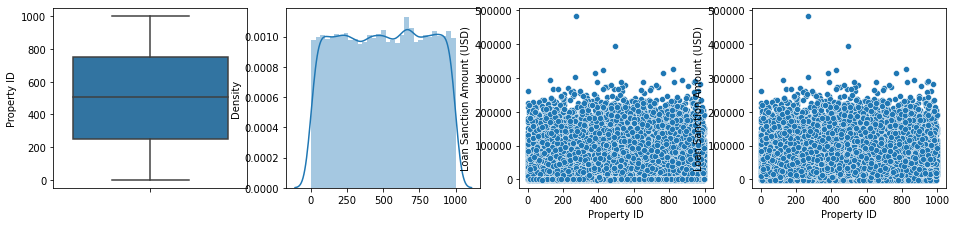

Income (Usd)


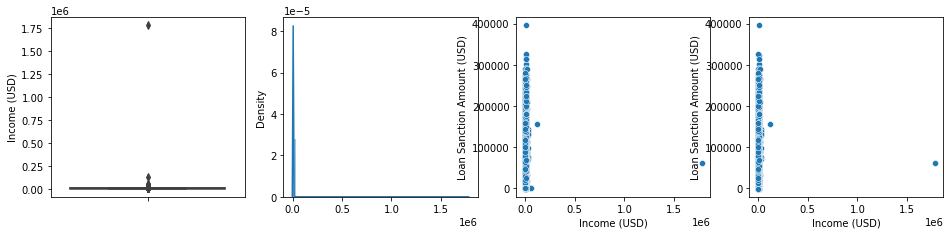

Loan Amount Request (Usd)


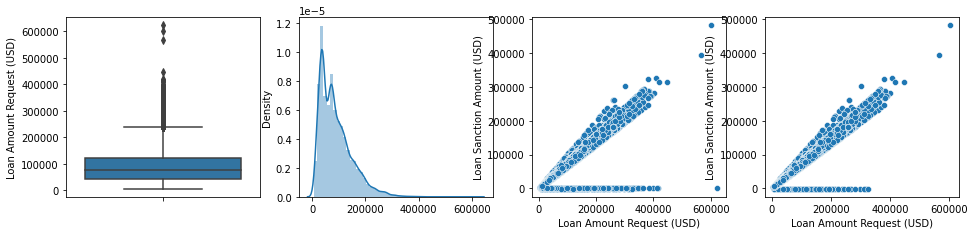

Property Price


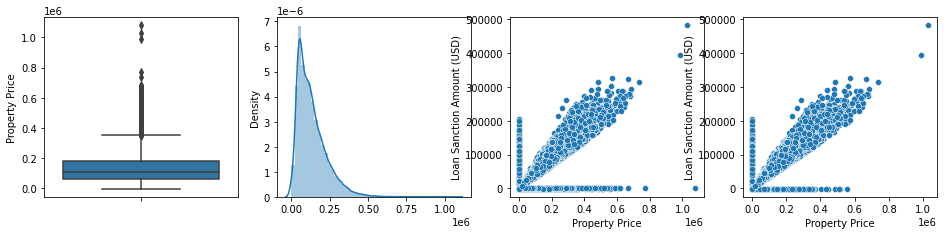

In [21]:
i = 1
for column in var_numerical:
    print(column.title())
    plt.subplots(figsize=(16, 35))
    plt.subplot(len(var_numerical) + 1, 4, i)
    sns.boxplot(y = df[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 4, i)
    sns.distplot(x = df[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 4, i)
    sns.scatterplot(y = df["Loan Sanction Amount (USD)"], x = df[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 4, i)
    sns.scatterplot(y = target_variable_without_zero, x = df[column])
    i += 1
    plt.show()

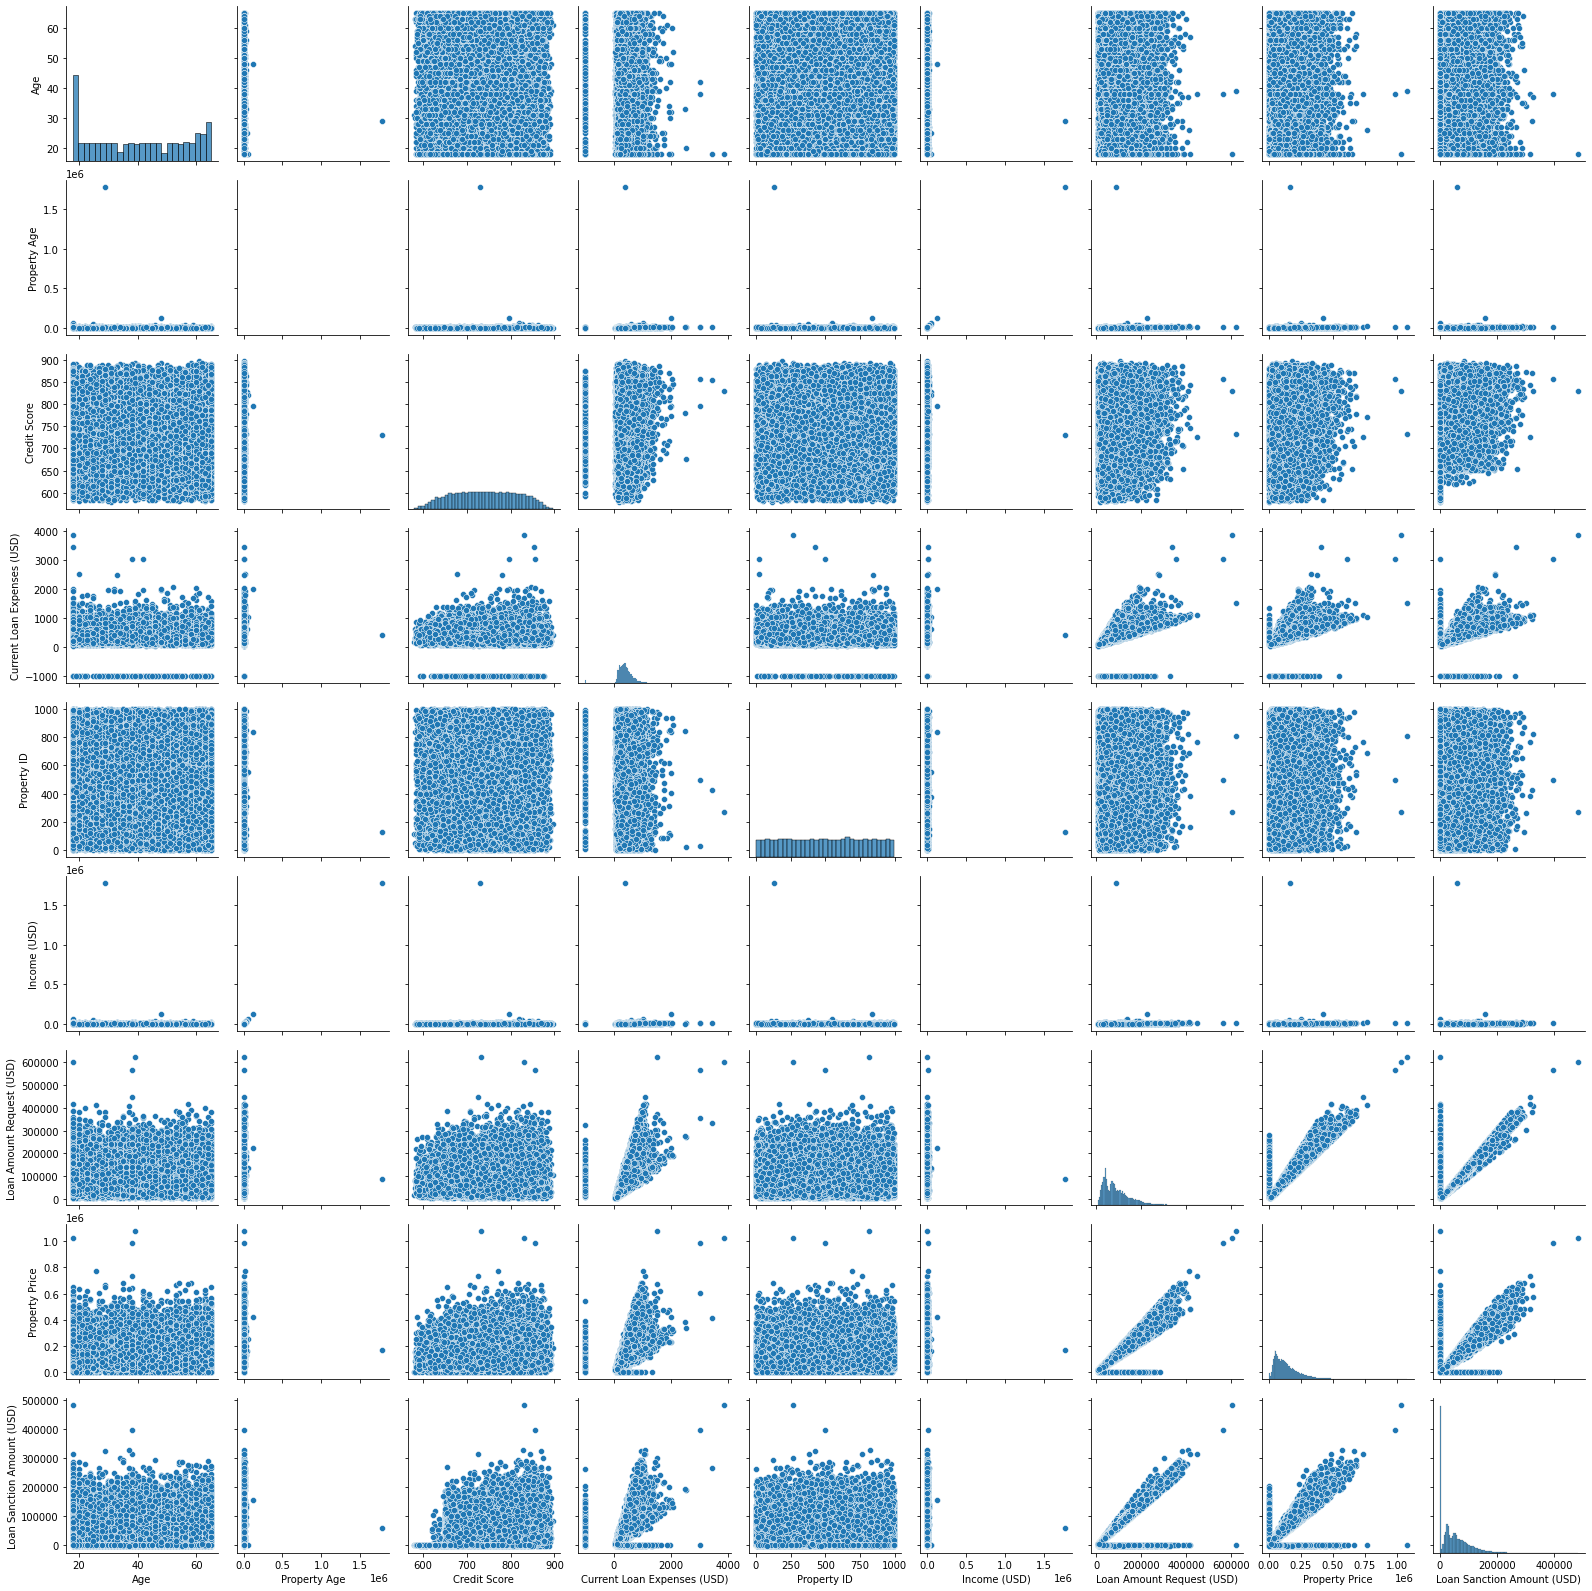

In [22]:
# Pairplot between all the variables
sns.pairplot(df[var_numerical + var_target])
plt.show()

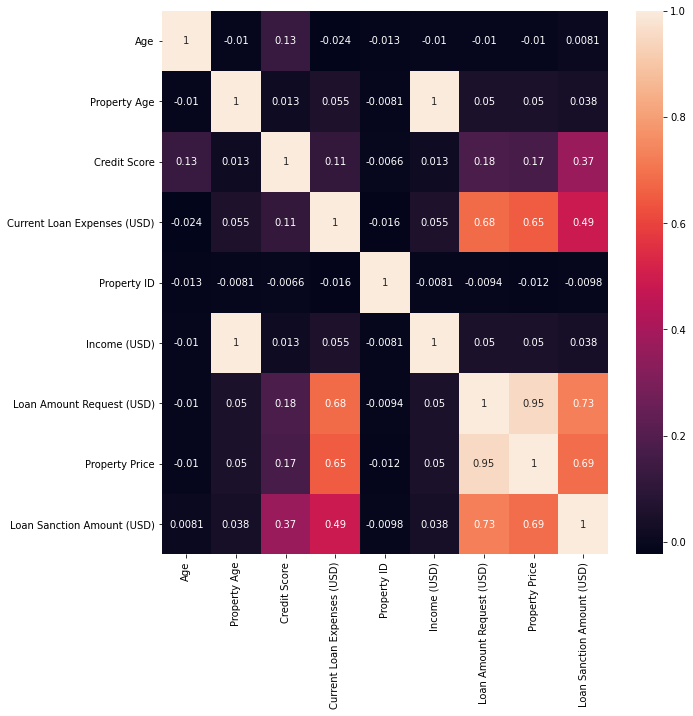

In [23]:
# Heatmap linear correlation between numerical variables
plt.figure(figsize=(10, 10))
sns.heatmap(df[var_numerical+var_target].corr(), annot=True)
plt.show()

By looking at the column value and heatmap, we can say that property age has income values in it.  So we will drop the 'Property Age' column.

In [24]:
df = df.drop(["Property Age"], axis = 1)

In [25]:
var_numerical = list( set(var_numerical) - set(['Property Age']))

We can see from heatmap that 'Loan Amount Request (USD)' and 'Property Price' has 0.95 collinearity. <br>
We know that the bank only lends up to 80%  of the total amount based on a person's finances (salary, outgoing expenses, existing loans, etc.). <br>
**So we will create a new column which store the minimum of request amount and 80% of property price.**

In [26]:
loan_to_be_requested = []
for i in range(len(df)):
    value = min(df["Loan Amount Request (USD)"][i], 0.80*df["Property Price"][i])
    loan_to_be_requested.append(value)

In [27]:
df["Loan_To_Be_Requested"] = loan_to_be_requested

In [28]:
len(df[df["Loan_To_Be_Requested"] <0])

341

In [29]:
len(df[df["Property Price"] <0])

341

In [30]:
len(df[df["Loan Amount Request (USD)"]<0])

0

In [31]:
df[df["Loan_To_Be_Requested"]==0]["Loan Sanction Amount (USD)"].head()

Series([], Name: Loan Sanction Amount (USD), dtype: float64)

In [32]:
len(df[df["Current Loan Expenses (USD)"]<0])

174

In [33]:
df = df[df["Property Price"] >=0]

In [34]:
df = df[df["Current Loan Expenses (USD)"]>=0]

In [35]:
df = df.reset_index(drop=True)

Loan_To_Be_Requested


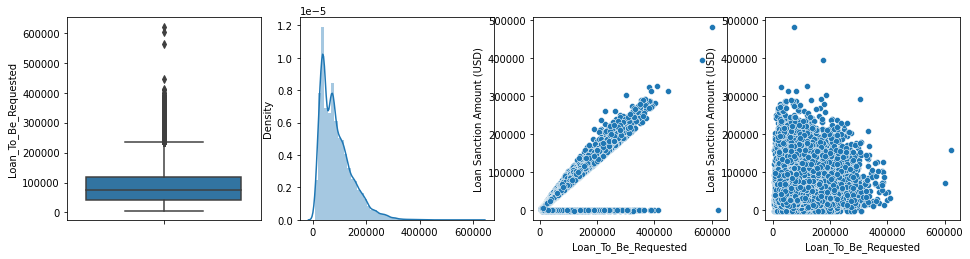

Current Loan Expenses (Usd)


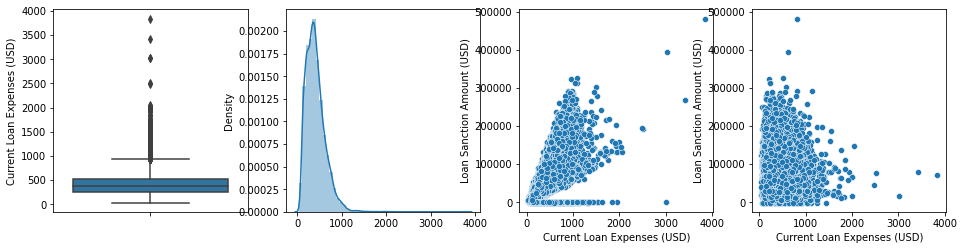

In [36]:
i = 1
for column in ["Loan_To_Be_Requested", "Current Loan Expenses (USD)"]:
    print(column.title())
    plt.subplots(figsize=(16, 35))
    plt.subplot(len(var_numerical) + 1, 4, i)
    sns.boxplot(y = df[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 4, i)
    sns.distplot(x = df[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 4, i)
    sns.scatterplot(y = df["Loan Sanction Amount (USD)"], x = df[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 4, i)
    sns.scatterplot(y = target_variable_without_zero, x = df[column])
    i += 1
    plt.show()

In [37]:
df = df.drop(["Loan Amount Request (USD)", "Property Price"], axis = 1)

In [38]:
var_numerical = list(set(var_numerical) - set(["Loan Amount Request (USD)", "Property Price"]))

In [39]:
var_numerical = var_numerical + ["Loan_To_Be_Requested"]

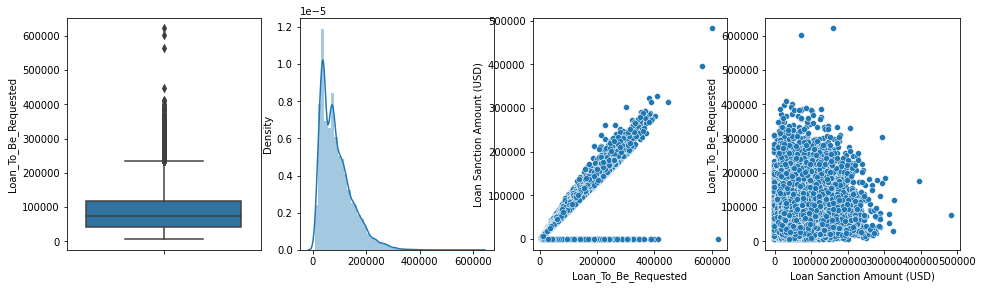

In [40]:
column = "Loan_To_Be_Requested"
i = 1
plt.subplots(figsize=(16, 35))
plt.subplot(len(var_numerical) + 1, 4, i)
sns.boxplot(y = df[column])
i += 1
plt.subplot(len(var_numerical) + 1, 4, i)
sns.distplot(x = df[column])
i += 1
plt.subplot(len(var_numerical) + 1, 4, i)
sns.scatterplot(y = df["Loan Sanction Amount (USD)"], x = df[column])
i += 1
plt.subplot(len(var_numerical) + 1, 4, i)
sns.scatterplot(x = target_variable_without_zero, y = df[column])
i += 1
plt.show()

In [41]:
df["Income (USD)"].sort_values(ascending=False)

20263    1777460.21
6506      122966.28
25722      54653.75
15471      48095.16
28592      32726.98
            ...    
28964           NaN
28966           NaN
28977           NaN
28979           NaN
28983           NaN
Name: Income (USD), Length: 28986, dtype: float64

In [42]:
df[df["Income (USD)"] > 40000]

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Loan Sanction Amount (USD),Loan_To_Be_Requested
6506,F,48,122966.28,Low,Working,Managers,Semi-Urban,1993.87,Y,N,NaN,795.26,0,NaN,836,4,Rural,1,156971.31,224244.73
15471,M,25,48095.16,Low,Working,Core staff,Urban,615.10,N,Y,3.0,826.98,1,Unpossessed,374,4,Rural,0,0.00,123975.88
20263,M,29,1777460.21,Low,Working,Laborers,Semi-Urban,390.93,N,Y,3.0,730.61,0,Inactive,129,4,Semi-Urban,1,61415.10,87735.85
25722,M,18,54653.75,Low,Commercial associate,NaN,Semi-Urban,1008.75,Y,N,2.0,819.38,0,Inactive,551,1,Semi-Urban,0,0.00,136800.45


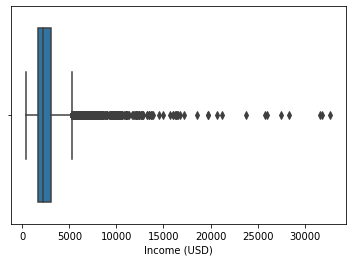

In [43]:
sns.boxplot(df[df["Income (USD)"] < 40000]["Income (USD)"])
plt.show()

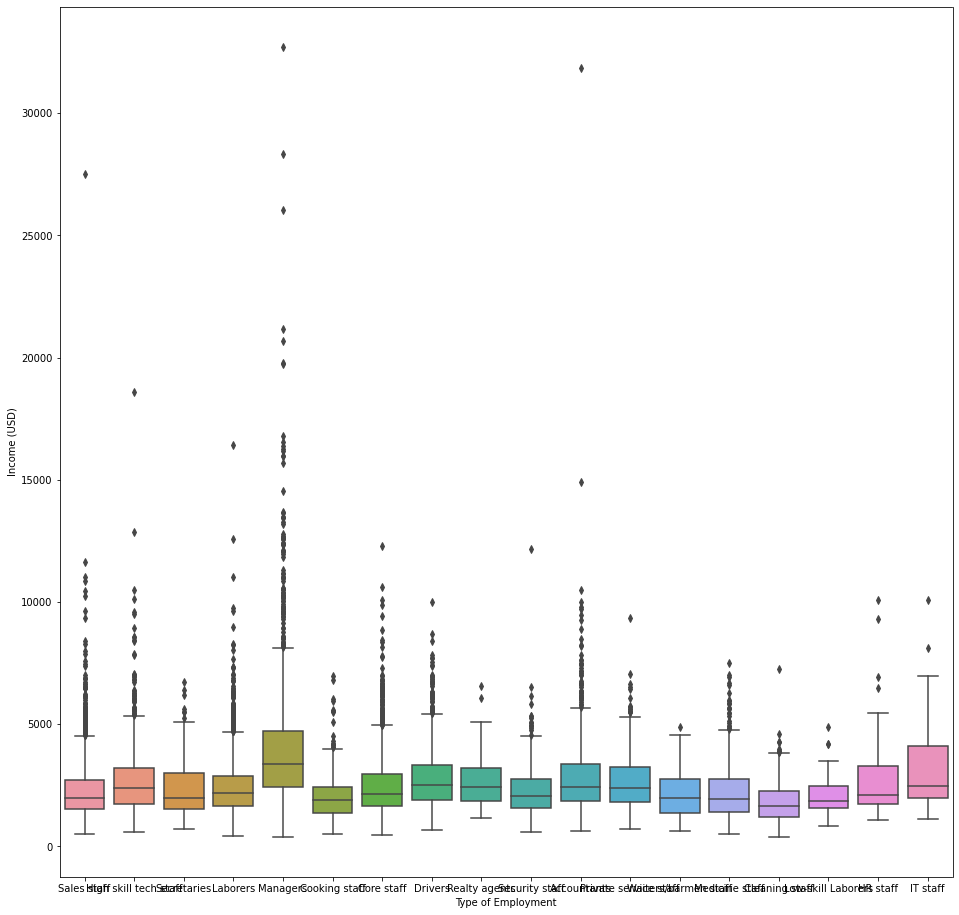

In [44]:
plt.figure(figsize=(16, 16))
sns.boxplot(x=df["Type of Employment"], y = df[df["Income (USD)"] < 40000]["Income (USD)"])
plt.show()

In [45]:
index0 = df[df["Income (USD)"] > 100000].index[0]
index1 = df[df["Income (USD)"] > 100000].index[1]

In [46]:
df["Income (USD)"][index0] = df[df["Type of Employment"] == df["Type of Employment"][index0]]["Income (USD)"].median()
df["Income (USD)"][index1] = df[df["Type of Employment"] == df["Type of Employment"][index1]]["Income (USD)"].median()

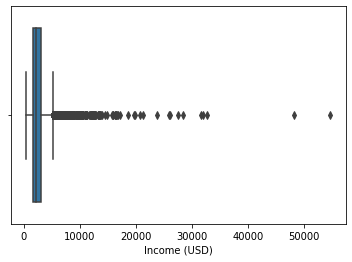

In [47]:
sns.boxplot(df["Income (USD)"])
plt.show()

# Handling Missing Values

In [48]:
missing_df = pd.DataFrame({
    "Columns": df.columns[df.isnull().sum()>0],
    "Values": df[df.columns[df.isnull().sum()>0]].isnull().sum()/len(df)*100
})
missing_df = missing_df.reset_index(drop=True)
missing_df

,Columns,Values
0,Gender,0.179397
1,Income (USD),14.920996
2,Income Stability,5.499207
3,Type of Employment,24.263438
4,Dependents,8.134962
5,Credit Score,5.519906
6,Has Active Credit Card,5.161112
7,Property Location,1.135031


In [49]:
df["Type of Employment"] = df["Type of Employment"].fillna("Other")

In [50]:
df["Type of Employment"].value_counts()

Other                    7033
Laborers                 5399
Sales staff              3614
Core staff               3112
Managers                 2400
Drivers                  1542
Accountants              1332
High skill tech staff    1266
Medicine staff            837
Security staff            563
Cooking staff             553
Cleaning staff            331
Private service staff     328
Secretaries               154
Low-skill Laborers        148
Waiters/barmen staff      144
Realty agents              85
IT staff                   74
HR staff                   71
Name: Type of Employment, dtype: int64

In [51]:
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode().values[0])

In [52]:
df["Dependents"].value_counts()

2.0     15047
3.0      5532
1.0      5366
4.0      2621
5.0       361
6.0        49
7.0         7
8.0         1
14.0        1
10.0        1
Name: Dependents, dtype: int64

In [53]:
df["Gender"].mode().values[0]

'M'

In [54]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode().values[0])

In [55]:
df["Income (USD)"] = df.groupby(by=["Type of Employment"])["Income (USD)"].transform(lambda x: x.fillna(x.median()))

In [56]:
df["Income Stability"] = df["Income Stability"].fillna(df["Income Stability"].mode().values[0])

<AxesSubplot:xlabel='Current Loan Expenses (USD)'>

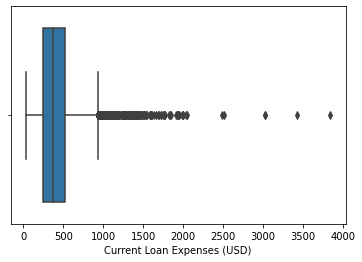

In [57]:
sns.boxplot(x = df["Current Loan Expenses (USD)"])

Here we can see that current loan has -999 expense which is wrong data.

In [58]:
len(df[df["Current Loan Expenses (USD)"]== -999]["Current Loan Expenses (USD)"])

0

In [59]:
for i in range(len(df)):
    if df["Current Loan Expenses (USD)"][i] == -999:
        df["Current Loan Expenses (USD)"][i] = np.nan

In [60]:
df["Current Loan Expenses (USD)"] = df["Current Loan Expenses (USD)"].fillna(df["Current Loan Expenses (USD)"].median())

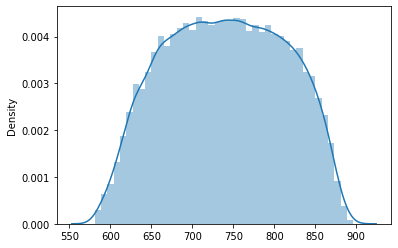

In [61]:
sns.distplot(x = df["Credit Score"])
plt.show()

We will impute mean values in credit score null places

In [62]:
df["Credit Score"] = df["Credit Score"].fillna(df["Credit Score"].mean())

In [63]:
df["Has Active Credit Card"].value_counts()

Active         9419
Inactive       9184
Unpossessed    8887
Name: Has Active Credit Card, dtype: int64

In [64]:
df["Has Active Credit Card"] = df["Has Active Credit Card"].fillna(df["Has Active Credit Card"].mode().values[0])

In [65]:
df["Property Location"].value_counts()

Semi-Urban    10027
Rural          9723
Urban          8907
Name: Property Location, dtype: int64

In [66]:
df["Property Location"] = df["Property Location"].fillna(df["Property Location"].mode().values[0])

In [67]:
df["Co-Applicant"].value_counts()

 1      24589
 0       4243
-999      154
Name: Co-Applicant, dtype: int64

In [68]:
for i in range(len(df)):
    if df["Co-Applicant"][i] == -999:
        df["Co-Applicant"][i] = 1

In [69]:
df.isnull().sum()/len(df)*100

Gender                         0.0
Age                            0.0
Income (USD)                   0.0
Income Stability               0.0
Profession                     0.0
Type of Employment             0.0
Location                       0.0
Current Loan Expenses (USD)    0.0
Expense Type 1                 0.0
Expense Type 2                 0.0
Dependents                     0.0
Credit Score                   0.0
No. of Defaults                0.0
Has Active Credit Card         0.0
Property ID                    0.0
Property Type                  0.0
Property Location              0.0
Co-Applicant                   0.0
Loan Sanction Amount (USD)     0.0
Loan_To_Be_Requested           0.0
dtype: float64

In [70]:
len(df)

28986

In [71]:
df[var_categorical].nunique()

Gender                     2
Income Stability           2
Profession                 8
Type of Employment        19
Location                   3
Expense Type 1             2
Expense Type 2             2
Dependents                10
No. of Defaults            2
Has Active Credit Card     3
Property Type              4
Property Location          3
Co-Applicant               2
dtype: int64

# One hot multiclass encoding

For columns 'Type of Employment' and 'Dependents', we will use one hot encoding for multiclass variables. <br/>
Based on the winning solution of KDD 2009 Cup i.e. we are going to limit the number of categories in the these 3 variables to 10 most frequent labels.

In [72]:
def top_labels(df, col, max_col):
    top = list(df[col].value_counts().sort_values(ascending=False).head(max_col).index)
    print("Top Labels: ", top)
    for categories in top:
        df[col+ "_" +str(categories)]=np.where(df[col]==categories,1,0)
        print(col + "_" + str(categories))
    return top

In [73]:
df["Type of Employment"].value_counts()

Other                    7033
Laborers                 5399
Sales staff              3614
Core staff               3112
Managers                 2400
Drivers                  1542
Accountants              1332
High skill tech staff    1266
Medicine staff            837
Security staff            563
Cooking staff             553
Cleaning staff            331
Private service staff     328
Secretaries               154
Low-skill Laborers        148
Waiters/barmen staff      144
Realty agents              85
IT staff                   74
HR staff                   71
Name: Type of Employment, dtype: int64

We will take top 12 columns for Type of Employment.

In [74]:
top_labels_emp = top_labels(df, 'Type of Employment', 12)
df = df.drop(['Type of Employment'], axis = 1)

Top Labels:  ['Other', 'Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers', 'Accountants', 'High skill tech staff', 'Medicine staff', 'Security staff', 'Cooking staff', 'Cleaning staff']
Type of Employment_Other
Type of Employment_Laborers
Type of Employment_Sales staff
Type of Employment_Core staff
Type of Employment_Managers
Type of Employment_Drivers
Type of Employment_Accountants
Type of Employment_High skill tech staff
Type of Employment_Medicine staff
Type of Employment_Security staff
Type of Employment_Cooking staff
Type of Employment_Cleaning staff


In [75]:
df["Dependents"].value_counts()

2.0     15047
3.0      5532
1.0      5366
4.0      2621
5.0       361
6.0        49
7.0         7
8.0         1
14.0        1
10.0        1
Name: Dependents, dtype: int64

Here we will take only top 8.

In [76]:
top_labels_dep = top_labels(df, 'Dependents', 8)
df = df.drop(['Dependents'], axis = 1)

Top Labels:  [2.0, 3.0, 1.0, 4.0, 5.0, 6.0, 7.0, 8.0]
Dependents_2.0
Dependents_3.0
Dependents_1.0
Dependents_4.0
Dependents_5.0
Dependents_6.0
Dependents_7.0
Dependents_8.0


In [77]:
df["Profession"].value_counts()

Working                 16342
Commercial associate     7697
Pensioner                2662
State servant            2279
Unemployed                  2
Businessman                 2
Student                     1
Maternity leave             1
Name: Profession, dtype: int64

In [78]:
top_labels_prof = top_labels(df, 'Profession', 4)
df = df.drop(['Profession'], axis = 1)

Top Labels:  ['Working', 'Commercial associate', 'Pensioner', 'State servant']
Profession_Working
Profession_Commercial associate
Profession_Pensioner
Profession_State servant


In [79]:
var_categorical = list(set(var_categorical) - set(['Type of Employment', 'Dependents', 'Profession']))

For profession column we will take only top 4 columns

In [80]:
# Make dummy variables for the nominal columns
df = pd.get_dummies(df, columns=var_categorical, drop_first=True)

In [81]:
df.head()

,Age,Income (USD),Current Loan Expenses (USD),Credit Score,Property ID,Loan Sanction Amount (USD),Loan_To_Be_Requested,Type of Employment_Other,Type of Employment_Laborers,Type of Employment_Sales staff,...,Co-Applicant_1,Expense Type 2_Y,Property Type_2,Property Type_3,Property Type_4,Property Location_Semi-Urban,Property Location_Urban,Expense Type 1_Y,Gender_M,No. of Defaults_1
0,56,1933.05,241.08,809.44,746,54607.18,72809.58,0,0,1,...,1,0,0,0,1,0,0,0,0,0
1,32,4952.91,495.81,780.40,608,37469.98,43832.80,1,0,0,...,1,1,1,0,0,0,0,0,1,0
2,65,988.19,171.95,833.15,546,36474.43,45593.04,1,0,0,...,0,1,1,0,0,0,1,0,0,0
3,65,2123.97,298.54,832.70,890,56040.54,80057.92,1,0,0,...,1,1,1,0,0,1,0,0,0,1
4,31,2614.77,491.41,745.55,715,74008.28,113858.89,0,0,0,...,1,1,0,0,1,1,0,0,0,1


# Split the dataset into train and test

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
df_regression = df[df["Loan Sanction Amount (USD)"]>0]

In [84]:
# We will divide the training and testing set in 70% and 30% respectively
# We used random_state = 100 so that everytime we run it we will have same set of training and testing set
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [85]:
print("Train Dataset: "+ str(len(df_train)) + " Test Dataset: " + str(len(df_test)))

Train Dataset: 20290 Test Dataset: 8696


# Dividing into X and Y sets for the model building

In [86]:
# Divide the train data into X and y

y_train = df_train.pop('Loan Sanction Amount (USD)')
X_train = df_train

In [87]:
# Divide the test data into X and y

y_test = df_test.pop('Loan Sanction Amount (USD)')
X_test = df_test

In [88]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20290, 45), (20290,), (8696, 45), (8696,))

# Scaling the numerical variables

In [89]:
min_max_scaler = ['Age', 'Current Loan Expenses (USD)']
robust_scaler = ['Loan_To_Be_Requested','Income (USD)']
standard_scaler = ['Property ID', 'Credit Score']

In [90]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [91]:
minMaxScaler = MinMaxScaler()
robustScaler = RobustScaler()
standardScaler = StandardScaler()

In [92]:
X_train[min_max_scaler] = minMaxScaler.fit_transform(X_train[min_max_scaler])
X_test[min_max_scaler] = minMaxScaler.transform(X_test[min_max_scaler])

In [93]:
X_train[robust_scaler] = robustScaler.fit_transform(X_train[robust_scaler])
X_test[robust_scaler] = robustScaler.transform(X_test[robust_scaler])

In [94]:
X_train[standard_scaler] = standardScaler.fit_transform(X_train[standard_scaler])
X_test[standard_scaler] = standardScaler.transform(X_test[standard_scaler])

In [95]:
X_train.head()

,Age,Income (USD),Current Loan Expenses (USD),Credit Score,Property ID,Loan_To_Be_Requested,Type of Employment_Other,Type of Employment_Laborers,Type of Employment_Sales staff,Type of Employment_Core staff,...,Co-Applicant_1,Expense Type 2_Y,Property Type_2,Property Type_3,Property Type_4,Property Location_Semi-Urban,Property Location_Urban,Expense Type 1_Y,Gender_M,No. of Defaults_1
10588,0.000000,0.000000,0.080166,-0.855879,-0.997295,-0.149005,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
12379,1.000000,-1.092789,0.017578,1.155910,0.314384,-0.690991,1,0,0,0,...,1,1,0,0,1,1,0,0,1,0
10855,0.936170,-0.618576,0.009377,0.290051,-0.851553,-0.811053,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
6595,0.340426,0.616131,0.072372,0.829254,-0.532308,-0.174797,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
7879,0.574468,0.437844,0.098290,-1.126264,-0.410856,-0.326480,0,0,1,0,...,1,1,0,0,1,0,1,1,0,0


# Model Building

# 1. Classification

We will run classification to identify whether the loan saction amount will be zero or not.

In [96]:
y_train_c = y_train.apply(lambda x: 1 if x>0 else 0)
y_test_c = y_test.apply(lambda x: 1 if x>0 else 0)

In [97]:
y_train_c.value_counts()*100/len(y_train_c)

1    72.114342
0    27.885658
Name: Loan Sanction Amount (USD), dtype: float64

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [100]:
# Model evaluation function
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
# Grid Search CV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# K Fold cross validation
from sklearn.model_selection import KFold

In [101]:
# Draw ROC curve from training and test data probability
def draw_roc( train_actual, train_probs, test_actual, test_probs ):
    train_fpr, train_tpr, train_thresholds = roc_curve( train_actual, train_probs,
                                              drop_intermediate = False )
    test_fpr, test_tpr, test_thresholds = roc_curve( test_actual, test_probs,
                                              drop_intermediate = False )
    train_auc_score = roc_auc_score( train_actual, train_probs )
    test_auc_score = roc_auc_score( test_actual, test_probs )
    plt.figure(figsize=(5, 5))
    plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % train_auc_score )
    plt.plot( test_fpr, test_tpr, label='ROC curve (area = %0.2f)' % test_auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# 1.1  Logistic Regression

In [102]:
logisticRegression = LogisticRegression()

In [103]:
logisticRegression.fit(X_train, y_train_c)

LogisticRegression()

In [104]:
y_pred_train_c = logisticRegression.predict(X_train)

In [105]:
y_pred_test_c = logisticRegression.predict(X_test)

In [106]:
print("Accuracy train: ", accuracy_score(y_train_c, y_pred_train_c))
print("Accuracy test: ", accuracy_score(y_test_c, y_pred_test_c))

Accuracy train:  0.8758994578610153
Accuracy test:  0.8714351425942962


In [107]:
print("ROC AUC train: ", roc_auc_score(y_train_c, y_pred_train_c))
print("ROC AUC test: ", roc_auc_score(y_test_c, y_pred_test_c))

ROC AUC train:  0.7910871009873719
ROC AUC test:  0.7844028127555193


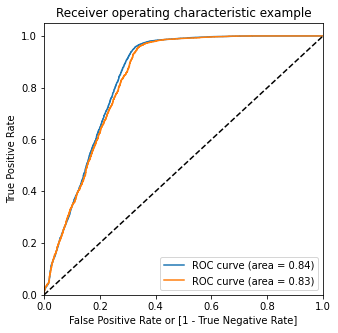

In [108]:
draw_roc(y_train_c, logisticRegression.predict_proba(X_train)[:, 1], y_test_c, logisticRegression.predict_proba(X_test)[:, 1])

# 1.2 Train Random Forest Classifier model with hyperparameter tuning

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
# Create the param grid for random forest
param_grid_rf = [{
               'max_depth': [5, 6, 7, 8, 9],
               'max_features': [10, 15, 20, 25, 30]}]
print(param_grid_rf)

[{'max_depth': [5, 6, 7, 8, 9], 'max_features': [10, 15, 20, 25, 30]}]


In [111]:
rf_model = RandomForestClassifier()

In [112]:
folds = KFold(n_splits = 5, shuffle = True, random_state=100)

In [113]:
grid_rf = GridSearchCV(estimator = rf_model, scoring='roc_auc', param_grid = param_grid_rf, cv = folds, 
                           verbose=0, return_train_score=True, n_jobs=3)
grid_rf.fit(X_train, y_train_c)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=3,
             param_grid=[{'max_depth': [5, 6, 7, 8, 9],
                          'max_features': [10, 15, 20, 25, 30]}],
             return_train_score=True, scoring='roc_auc')

In [114]:
grid_rf.best_params_

{'max_depth': 7, 'max_features': 30}

In [115]:
cv_results = pd.DataFrame(grid_rf.cv_results_)
cv_results[["param_max_depth","param_max_features","mean_train_score","mean_test_score"]]

,param_max_depth,param_max_features,mean_train_score,mean_test_score
0,5,10,0.875792,0.857972
1,5,15,0.881900,0.863814
2,5,20,0.883752,0.867358
3,5,25,0.883451,0.867059
4,5,30,0.883690,0.867775
5,6,10,0.890920,0.861052
6,6,15,0.894768,0.864942
7,6,20,0.894225,0.868349
8,6,25,0.895449,0.868971
9,6,30,0.892139,0.868667


In [116]:
rf_model = RandomForestClassifier(max_depth = grid_rf.best_params_["max_depth"], 
                                  max_features= grid_rf.best_params_["max_features"])

In [117]:
rf_model.fit(X_train, y_train_c)

RandomForestClassifier(max_depth=7, max_features=30)

In [118]:
y_train_pred_rf_c = rf_model.predict(X_train)
y_test_pred_rf_c = rf_model.predict(X_test)

In [119]:
print("Accuracy train: ", accuracy_score(y_train_c, y_train_pred_rf_c))
print("Accuracy test: ", accuracy_score(y_test_c, y_test_pred_rf_c))

Accuracy train:  0.9085756530310498
Accuracy test:  0.9040938362465502


In [120]:
print("ROC AUC train: ", roc_auc_score(y_train_c, y_train_pred_rf_c))
print("ROC AUC test: ", roc_auc_score(y_test_c, y_test_pred_rf_c))

ROC AUC train:  0.8360728172499117
ROC AUC test:  0.8295175797219951


In [121]:
act_prob_pred = pd.DataFrame({
    "Actual": y_train_c,
    "Prediction Prob 1" : rf_model.predict_proba(X_train)[:,1],
    "Prediction Prob 2" : rf_model.predict_proba(X_train)[:,0],
    "Prediction": y_train_pred_rf_c
    })

In [122]:
act_prob_pred[act_prob_pred["Actual"]!=act_prob_pred["Prediction"]].to_csv("looks_at_threshold.csv")

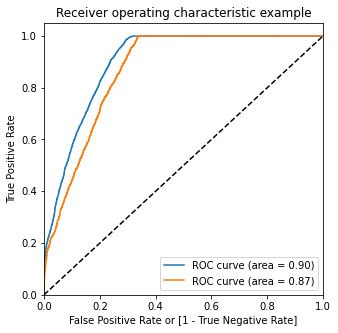

In [123]:
draw_roc(y_train_c, rf_model.predict_proba(X_train)[:, 1], y_test_c, rf_model.predict_proba(X_test)[:, 1])

In [124]:
print("Confusion Matrix train: \n", confusion_matrix(y_train_c, y_train_pred_rf_c))
print("Confusion Matrix test: \n", confusion_matrix(y_test_c, y_test_pred_rf_c))

Confusion Matrix train: 
 [[ 3803  1855]
 [    0 14632]]
Confusion Matrix test: 
 [[1612  834]
 [   0 6250]]


# 2. Linear Regression (statsmodels)

Looking at this confusion matrix we can see that we are prediction that we are going to provide loan but we actually are not. But when we apply regression on top it we are going to get less value so we can proceed with this random forest model.

We can see that there is linear relationship between some of the columns with the target variable.

In [125]:
import statsmodels.api as sm

In [126]:
X_train_const = sm.add_constant(X_train)

In [127]:
lm = sm.OLS(y_train, X_train_const).fit()  

In [128]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Loan Sanction Amount (USD)   R-squared:                       0.643
Model:                                    OLS   Adj. R-squared:                  0.642
Method:                         Least Squares   F-statistic:                     810.7
Date:                        Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                                05:47:20   Log-Likelihood:            -2.3714e+05
No. Observations:                       20290   AIC:                         4.744e+05
Df Residuals:                           20244   BIC:                         4.747e+05
Df Model:                                  45                                         
Covariance Type:                    nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     -830.3329   2.51e+04     -0.033      0.974      -5e+04    4.84e+04
Age                                      -1322.7159    670.620     -1.972      0.049   -2637.186      -8.246
Income (USD)                              -920.1002    204.128     -4.507      0.000   -1320.207    -519.994
Current Loan Expenses (USD)               -776.1944   5587.968     -0.139      0.890   -1.17e+04    1.02e+04
Credit Score                              1.024e+04    224.955     45.539      0.000    9803.201    1.07e+04
Property ID                                -56.0539    202.975     -0.276      0.782    -453.900     341.793
Loan_To_Be_Requested                      4.379e+04    418.934    104.531      0.000     4.3e+04    4.46e+04
Type of Employment_Other                 -1048.8691   1209.723     -0.867      0.386   -3420.024    1322.286
Type of Employment_Laborers              -2361.0630   1188.243     -1.987      0.047   -4690.117     -32.009
Type of Employment_Sales staff           -2188.9023   1232.589     -1.776      0.076   -4604.878     227.073
Type of Employment_Core staff             -844.4287   1264.573     -0.668      0.504   -3323.095    1634.237
Type of Employment_Managers               1012.0584   1316.734      0.769      0.442   -1568.847    3592.964
Type of Employment_Drivers               -3061.4597   1414.489     -2.164      0.030   -5833.973    -288.947
Type of Employment_Accountants            -382.0809   1444.499     -0.265      0.791   -3213.415    2449.254
Type of Employment_High skill tech staff -2049.0881   1468.373     -1.395      0.163   -4927.219     829.043
Type of Employment_Medicine staff         -619.2935   1629.074     -0.380      0.704   -3812.411    2573.824
Type of Employment_Security staff        -3508.6759   1818.675     -1.929      0.054   -7073.426      56.074
Type of Employment_Cooking staff         -2075.2394   1824.981     -1.137      0.255   -5652.350    1501.871
Type of Employment_Cleaning staff         -942.3981   2239.570     -0.421      0.674   -5332.136    3447.340
Dependents_2.0                            3521.9469   2.04e+04      0.172      0.863   -3.65e+04    4.35e+04
Dependents_3.0                            1854.2928   2.04e+04      0.091      0.928   -3.82e+04    4.19e+04
Dependents_1.0                            2377.9982   2.04e+04      0.116      0.907   -3.76e+04    4.24e+04
Dependents_4.0                            1457.5583   2.04e+04      0.071      0.943   -3.86e+04    4.15e+04
Dependents_5.0                            -426.3194   2.05e+04     -0.021      0.983   -4.06e+04    3.97e+04
Dependents_6.0                            1658.7961 

There are too many variables with high p-values so we will remove some variables using RFE.

# 2.2 Features selection using RFE

In [129]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [130]:
# Running RFE with the output number of the variable equal to 10
lr = LinearRegression()
lr.fit(X_train, y_train)

# running RFE 
# For the first model we are taking half features
rfe = RFE(lr, 10)             
rfe = rfe.fit(X_train, y_train)

In [131]:
# Columns with RFE Support as True
col = X_train.columns[rfe.support_]
len(col), col

(10,
 Index(['Credit Score', 'Loan_To_Be_Requested',
        'Type of Employment_Security staff', 'Dependents_2.0', 'Dependents_7.0',
        'Dependents_8.0', 'Profession_Pensioner', 'Income Stability_Low',
        'Co-Applicant_1', 'No. of Defaults_1'],
       dtype='object'))

#### Building model using statsmodel, for the detailed statistics

In [132]:
# Creating X_train_rfe dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [133]:
# Adding a constant to X_train_rfe as statsmodel does not include it. We have to explicitly define it.

X_train_rfe_const = sm.add_constant(X_train_rfe)

In [134]:
# Running the linear model

lm1 = sm.OLS(y_train, X_train_rfe_const).fit()   

In [135]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Loan Sanction Amount (USD)   R-squared:                       0.642
Model:                                    OLS   Adj. R-squared:                  0.642
Method:                         Least Squares   F-statistic:                     3636.
Date:                        Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                                05:47:26   Log-Likelihood:            -2.3717e+05
No. Observations:                       20290   AIC:                         4.744e+05
Df Residuals:                           20279   BIC:                         4.745e+05
Df Model:                                  10                                         
Covariance Type:                    nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              -650.0749   2738.897     -0.237      0.812   -6018.534    4718.384
Credit Score                       1.038e+04    217.009     47.819      0.000    9951.811    1.08e+04
Loan_To_Be_Requested               4.338e+04    273.852    158.398      0.000    4.28e+04    4.39e+04
Type of Employment_Security staff -1857.7135   1470.846     -1.263      0.207   -4740.690    1025.263
Dependents_2.0                     1606.0039    410.348      3.914      0.000     801.688    2410.320
Dependents_7.0                    -4776.5920   1.18e+04     -0.405      0.685   -2.79e+04    1.83e+04
Dependents_8.0                     1.579e+04   2.89e+04      0.547      0.585   -4.08e+04    7.24e+04
Profession_Pensioner                1.79e+04   2608.714      6.862      0.000    1.28e+04     2.3e+04
Income Stability_Low               9719.2538   2670.501      3.639      0.000    4484.855     1.5e+04
Co-Applicant_1                     3.507e+04    595.428     58.905      0.000    3.39e+04    3.62e+04
No. of Defaults_1                 -2278.1947    515.500     -4.419      0.000   -3288.616   -1267.774
==============================================================================
Omnibus:                     7929.745   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39659.330
Skew:                          -1.844   Prob(JB):                         0.00
Kurtosis:                       8.771   Cond. No.                         247.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()

X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Income Stability_Low,7.87
8,Co-Applicant_1,7.10
3,Dependents_2.0,2.13
6,Profession_Pensioner,1.40
9,No. of Defaults_1,1.24
0,Credit Score,1.14
1,Loan_To_Be_Requested,1.09
2,Type of Employment_Security staff,1.02
4,Dependents_7.0,1.00
5,Dependents_8.0,1.00


# 2.3 Ridge Regression

In [137]:
# Initialisation of ridge linear regression model
ridge_lr = Ridge(random_state = 42)

In [138]:
# Create the param grid for logistic regression
param_ridge_lr = {
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
     0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
     4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]
}
print(param_ridge_lr)

{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}


In [139]:
folds = KFold(n_splits = 5, shuffle = True, random_state=100)

In [140]:
grid_ridge = GridSearchCV(estimator = ridge_lr, scoring= 'r2', param_grid = param_ridge_lr, cv = folds, 
                           verbose=0, return_train_score=True, n_jobs=3)
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(random_state=42), n_jobs=3,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2')

In [141]:
int(grid_ridge.best_estimator_.alpha)

20

In [142]:
pd.DataFrame(grid_ridge.cv_results_)[['param_alpha', 'mean_test_score', 'mean_train_score']]

,param_alpha,mean_test_score,mean_train_score
0,0.0001,0.641204,0.643302
1,0.001,0.641206,0.643302
2,0.01,0.641216,0.643302
3,0.05,0.641248,0.643302
4,0.1,0.641270,0.643300
5,0.2,0.641293,0.643298
6,0.3,0.641306,0.643297
7,0.4,0.641314,0.643296
8,0.5,0.641320,0.643295
9,0.6,0.641325,0.643294


In [143]:
#Fitting ridge model and printing coefficients which have been penalised
alpha = int(grid_ridge.best_estimator_.alpha)
ridge = Ridge(alpha=alpha)

In [144]:
ridge = ridge.fit(X_train, y_train)
ridge

Ridge(alpha=20)

In [145]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train Score: ", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test Score: ", r2_train_lr)
metric2.append(r2_test_lr)

R2 Train Score:  0.6430726732599077
R2 Test Score:  0.6430726732599077


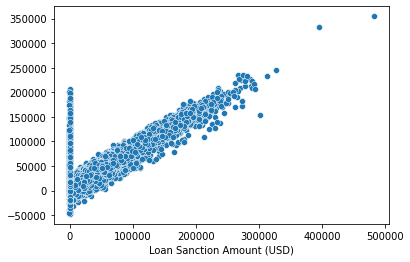

In [146]:
sns.scatterplot(x = y_train, y=y_pred_train)
plt.show()

# 2.4 Lasso Regression

In [147]:
# Initialise the lasso model
lasso_lr = Lasso(random_state = 42)

In [148]:
# Create the param grid for logistic regression
param_lasso_lr = {
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]
}
print(param_lasso_lr)

{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}


In [149]:
grid_lasso = GridSearchCV(estimator = lasso_lr, scoring= 'r2', param_grid = param_lasso_lr, cv = folds, 
                           verbose=0, return_train_score=True, n_jobs=3)
grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(random_state=42), n_jobs=3,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2')

In [150]:
int(grid_lasso.best_estimator_.alpha)

10

In [151]:
pd.DataFrame(grid_lasso.cv_results_)[['param_alpha', 'mean_test_score', 'mean_train_score']]

,param_alpha,mean_test_score,mean_train_score
0,0.0001,0.641308,0.643295
1,0.001,0.641309,0.643295
2,0.01,0.641310,0.643295
3,0.05,0.641314,0.643295
4,0.1,0.641320,0.643294
5,0.2,0.641331,0.643293
6,0.3,0.641340,0.643292
7,0.4,0.641348,0.643291
8,0.5,0.641355,0.643290
9,0.6,0.641361,0.643289


In [152]:
#Fitting lasso model and printing coefficients which have been penalised
alpha = int(grid_lasso.best_estimator_.alpha)
lasso = Lasso(alpha=alpha)

lasso = lasso.fit(X_train, y_train)
lasso

Lasso(alpha=10)

In [153]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train Score: ", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test Score: ", r2_train_lr)
metric3.append(r2_test_lr)

R2 Train Score:  0.6430415658264912
R2 Test Score:  0.6430415658264912


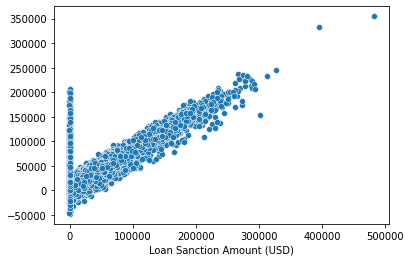

In [154]:
sns.scatterplot(x = y_train, y=y_pred_train)
plt.show()

In [155]:
betas = pd.DataFrame(index=df_train.columns)
betas.rows = df_train.columns

In [156]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Linear Regression'] = lm.params
betas['Linear Regression with RFE'] = lm1.params

In [157]:
pd.set_option('display.max_rows', None)
betas

,Ridge,Lasso,Linear Regression,Linear Regression with RFE
Age,-1249.055687,-1155.223373,-1322.715850,NaN
Income (USD),-916.030921,-904.927327,-920.100156,NaN
Current Loan Expenses (USD),543.257700,-0.000000,-776.194358,NaN
Credit Score,10267.624653,10267.355786,10244.131453,10377.167286
Property ID,-53.425592,-44.239200,-56.053859,NaN
Loan_To_Be_Requested,43633.225734,43723.239510,43791.514396,43377.555726
Type of Employment_Other,-593.148434,-0.000000,-1048.869119,NaN
Type of Employment_Laborers,-1970.848229,-1350.088664,-2361.062976,NaN
Type of Employment_Sales staff,-1794.475256,-1150.127512,-2188.902339,NaN
Type of Employment_Core staff,-468.621571,0.000000,-844.428694,NaN


# Creating Submission File

In [158]:
df_test = pd.read_csv('/kaggle/input/sanction-loan/test.csv')

In [159]:
df_test.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0


In [160]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Name                         20000 non-null  object 
 2   Gender                       19969 non-null  object 
 3   Age                          20000 non-null  int64  
 4   Income (USD)                 19250 non-null  float64
 5   Income Stability             19187 non-null  object 
 6   Profession                   20000 non-null  object 
 7   Type of Employment           15311 non-null  object 
 8   Location                     20000 non-null  object 
 9   Loan Amount Request (USD)    20000 non-null  float64
 10  Current Loan Expenses (USD)  19917 non-null  float64
 11  Expense Type 1               20000 non-null  object 
 12  Expense Type 2               20000 non-null  object 
 13  Dependents      

In [161]:
df_test.replace('?', np.NaN, inplace=True)

In [162]:
df_test.isnull().sum()

Customer ID                       0
Name                              0
Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                     77
Property Price                  168
dtype: int64

Income Stability


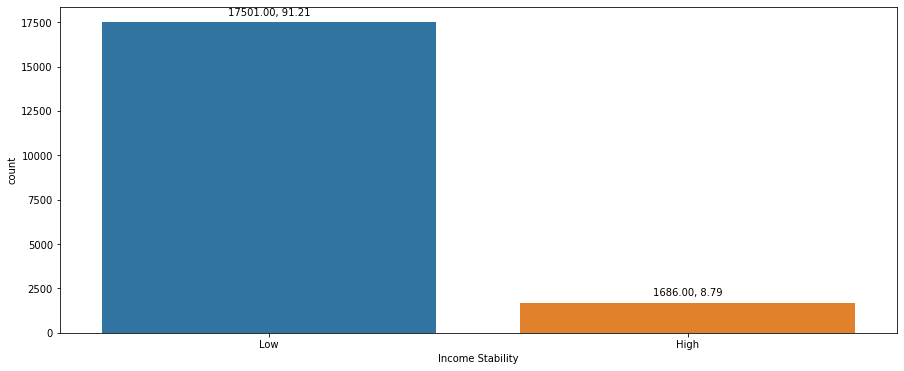

Location


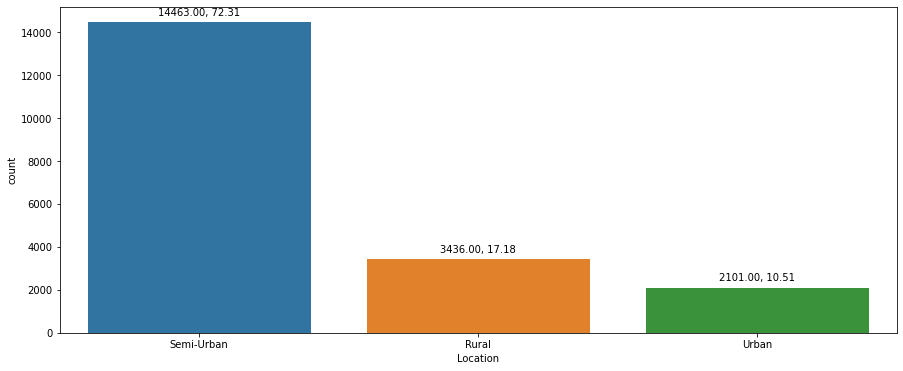

Has Active Credit Card


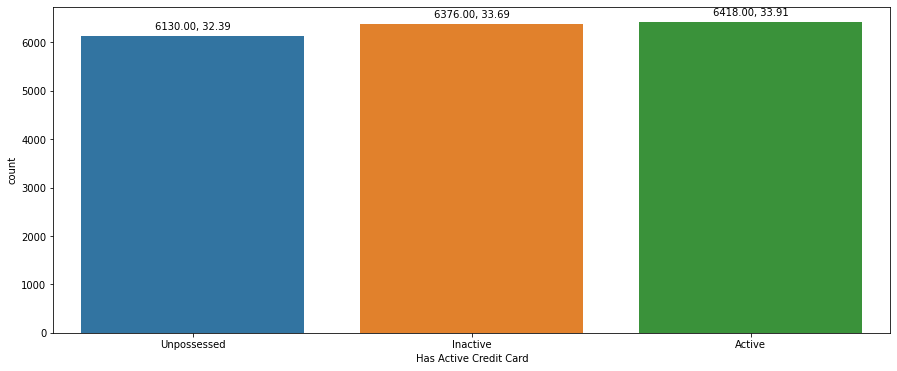

Co-Applicant


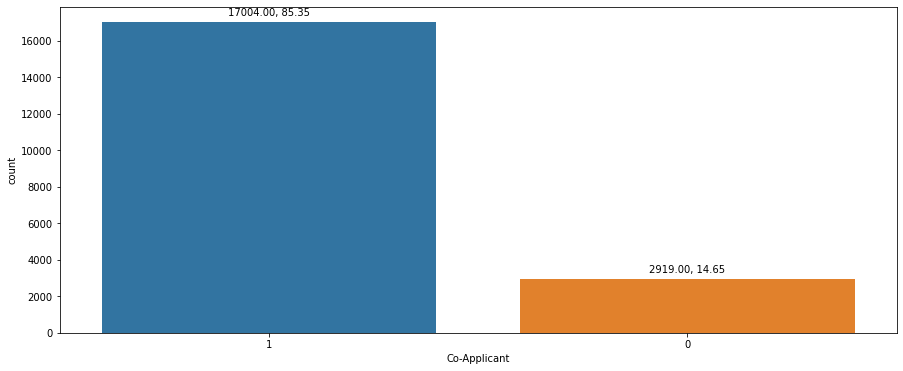

Expense Type 2


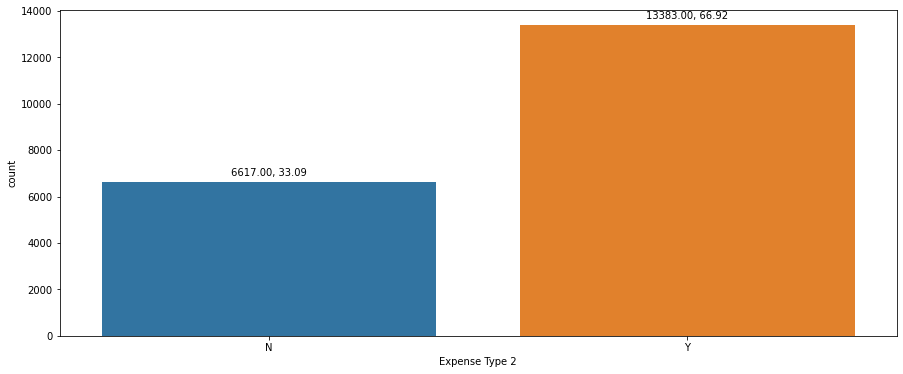

Property Type


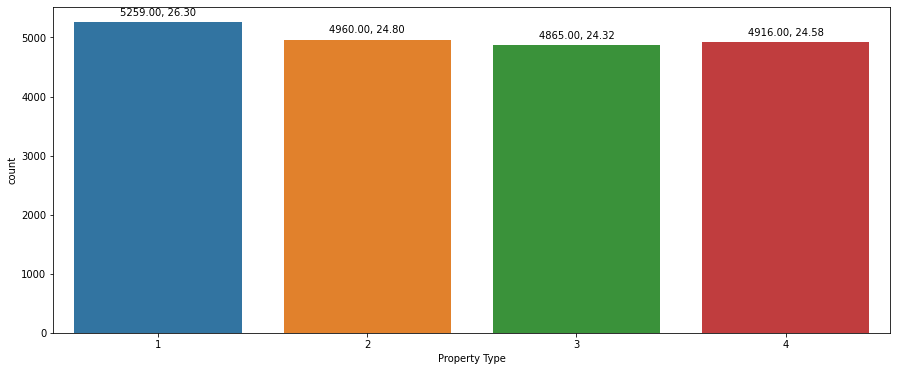

Property Location


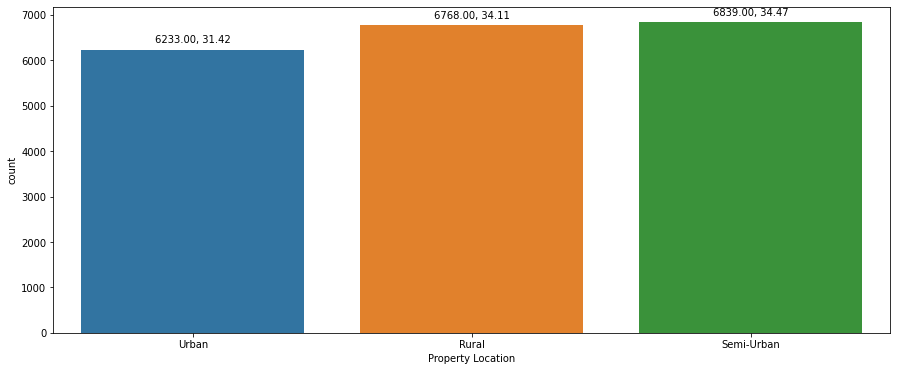

Expense Type 1


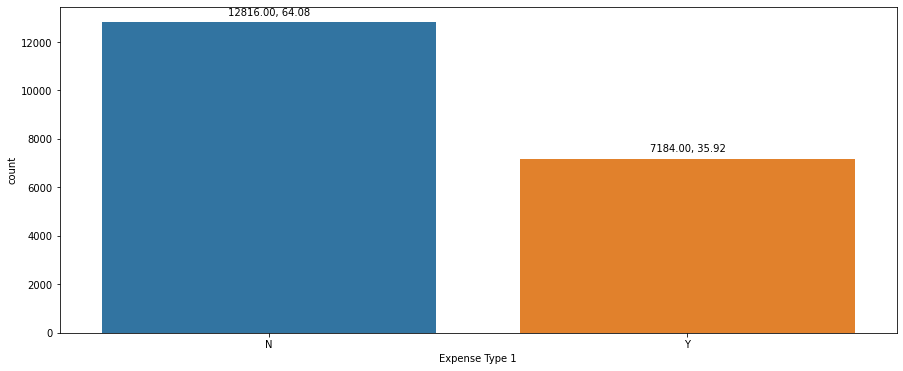

Gender


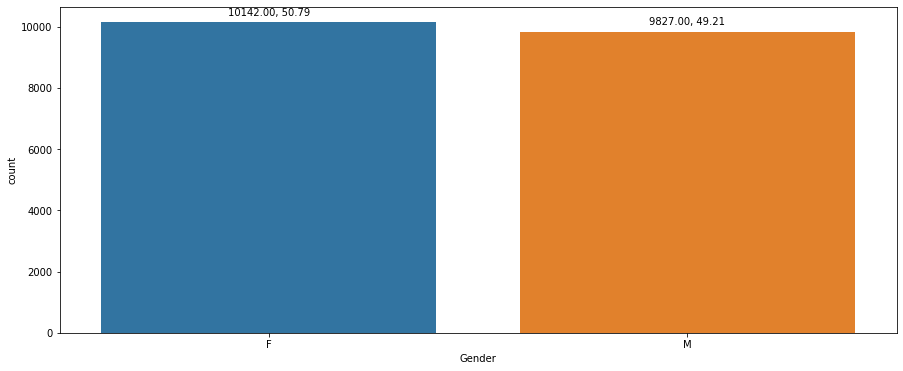

No. Of Defaults


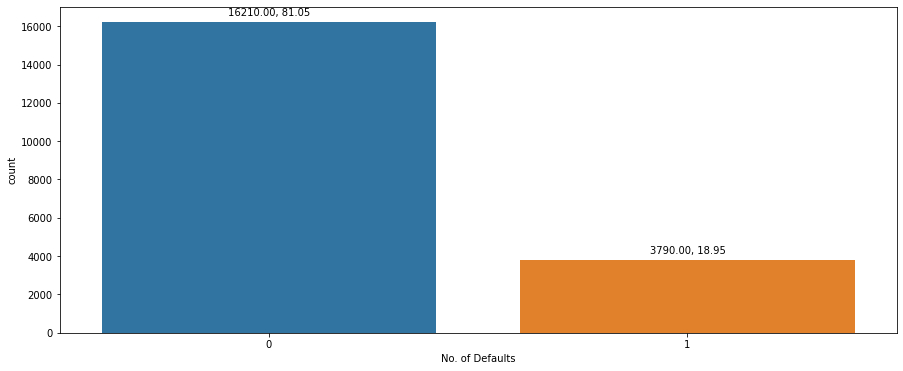

In [163]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df_test[column])
    label_values(ax)
    plt.show()

In [164]:
loan_to_be_requested_test = []
for i in range(len(df_test)):
#     print(df_test["Loan Amount Request (USD)"][i], df_test["Property Price"][i])
    if df_test["Property Price"][i] == np.nan:
        value = df_test["Loan Amount Request (USD)"][i]
    else:
        value = min(df_test["Loan Amount Request (USD)"][i], 0.80*float(df_test["Property Price"][i]))
    loan_to_be_requested_test.append(value)

In [165]:
df_test = df_test.drop(['Loan Amount Request (USD)', 'Property Price', 'Property Age'], axis = 1)

In [166]:
df_test["Loan_To_Be_Requested"] = loan_to_be_requested_test

Age


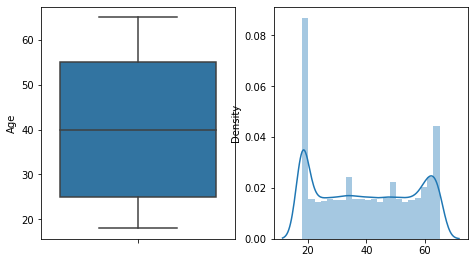

Credit Score


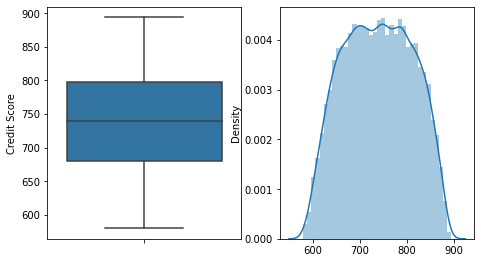

Current Loan Expenses (Usd)


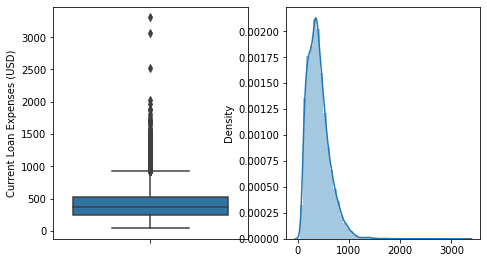

Property Id


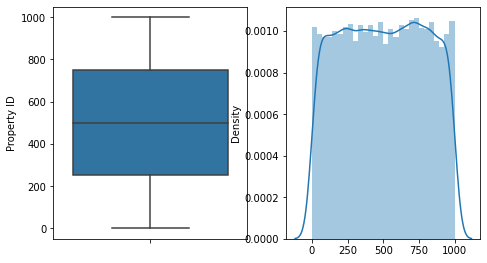

Income (Usd)


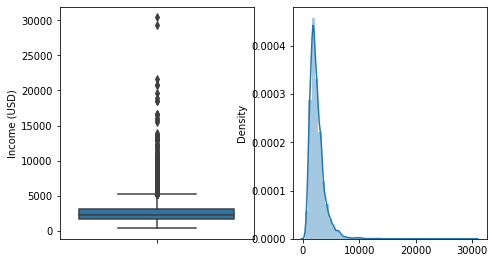

Loan_To_Be_Requested


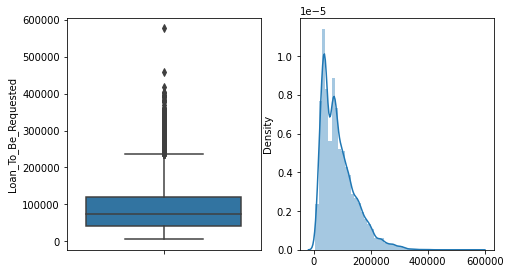

In [167]:
i = 1
for column in var_numerical:
    print(column.title())
    plt.subplots(figsize=(16, 35))
    plt.subplot(len(var_numerical) + 1, 4, i)
    sns.boxplot(y = df_test[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 4, i)
    sns.distplot(x = df_test[column])
    i += 1
    plt.show()

In [168]:
df_test["Type of Employment"] = df_test["Type of Employment"].fillna("Other")

In [169]:
df_test["Dependents"] = df_test["Dependents"].fillna(0)

In [170]:
df_test["Gender"] = df_test["Gender"].fillna(df_test["Gender"].mode().values[0])

In [171]:
df_test["Income (USD)"] = df_test["Income (USD)"].fillna(df_test["Income (USD)"].median())

In [172]:
df_test["Income Stability"] = df_test["Income Stability"].fillna(df_test["Income Stability"].mode().values[0])

In [173]:
df_test["Current Loan Expenses (USD)"] = df_test["Current Loan Expenses (USD)"].fillna(df_test["Current Loan Expenses (USD)"].median())

We will impute mean values in credit score null places

In [174]:
df_test["Credit Score"] = df_test["Credit Score"].fillna(df_test["Credit Score"].mean())

In [175]:
df_test["Has Active Credit Card"] = df_test["Has Active Credit Card"].fillna(df_test["Has Active Credit Card"].mode().values[0])

In [176]:
df_test["Property Location"] = df_test["Property Location"].fillna(df_test["Property Location"].mode().values[0])

In [177]:
df_test["Co-Applicant"] = df_test["Co-Applicant"].fillna(1)

For columns 'Type of Employment' and 'Dependents', we will use one hot encoding for multiclass variables. <br/>
Based on the winning solution of KDD 2009 Cup i.e. we are going to limit the number of categories in the these 3 variables to 10 most frequent labels.

In [178]:
def top_labels(df_test, col, max_col, top):
    print("Top Labels: ", top)
    for categories in top:
        df_test[col+ "_" +str(categories)]=np.where(df_test[col]==categories,1,0)
        print(col + "_" + str(categories))

We will take top 12 columns for Type of Employment.

In [179]:
top_labels(df_test, 'Type of Employment', 12, top_labels_emp)
df_test = df_test.drop(['Type of Employment'], axis = 1)

Top Labels:  ['Other', 'Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers', 'Accountants', 'High skill tech staff', 'Medicine staff', 'Security staff', 'Cooking staff', 'Cleaning staff']
Type of Employment_Other
Type of Employment_Laborers
Type of Employment_Sales staff
Type of Employment_Core staff
Type of Employment_Managers
Type of Employment_Drivers
Type of Employment_Accountants
Type of Employment_High skill tech staff
Type of Employment_Medicine staff
Type of Employment_Security staff
Type of Employment_Cooking staff
Type of Employment_Cleaning staff


Here we will take only top 8.

In [180]:
top_labels(df_test, 'Dependents', 8, top_labels_dep)
df_test = df_test.drop(['Dependents'], axis = 1)

Top Labels:  [2.0, 3.0, 1.0, 4.0, 5.0, 6.0, 7.0, 8.0]
Dependents_2.0
Dependents_3.0
Dependents_1.0
Dependents_4.0
Dependents_5.0
Dependents_6.0
Dependents_7.0
Dependents_8.0


In [181]:
top_labels(df_test, 'Profession', 4, top_labels_prof)
df_test = df_test.drop(['Profession'], axis = 1)

Top Labels:  ['Working', 'Commercial associate', 'Pensioner', 'State servant']
Profession_Working
Profession_Commercial associate
Profession_Pensioner
Profession_State servant


For profession column we will take only top 4 columns

In [182]:
# Make dummy variables for the nominal columns
df_test = pd.get_dummies(df_test, columns=var_categorical, drop_first=True)

In [183]:
df_test[min_max_scaler] = minMaxScaler.transform(df_test[min_max_scaler])

In [184]:
df_test[robust_scaler] = robustScaler.transform(df_test[robust_scaler])

In [185]:
df_test[standard_scaler] = standardScaler.transform(df_test[standard_scaler])

#### First use classification

In [186]:
class_pred = rf_model.predict(df_test[list(X_train.columns)])

In [187]:
col = list(col)

In [188]:
col

['Credit Score',
 'Loan_To_Be_Requested',
 'Type of Employment_Security staff',
 'Dependents_2.0',
 'Dependents_7.0',
 'Dependents_8.0',
 'Profession_Pensioner',
 'Income Stability_Low',
 'Co-Applicant_1',
 'No. of Defaults_1']

In [189]:
X_df_test = df_test[col]

In [190]:
y_pred_test_sub = lm1.predict(sm.add_constant(X_df_test))

In [191]:
df_test["Loan Sanction Amount (USD)"] = y_pred_test_sub

In [192]:
df_sub = df_test[["Customer ID", "Loan Sanction Amount (USD)"]]

In [193]:
df_sub.head()

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,89283.520458
1,C-35067,76354.701829
2,C-34590,84324.667474
3,C-16668,45128.176492
4,C-12196,71860.521459


In [194]:
for i in range(len(class_pred)):
    if class_pred[i] == 0:
        df_sub["Loan Sanction Amount (USD)"][i] = 0
    if df_sub["Loan Sanction Amount (USD)"][i] < 0:
        df_sub["Loan Sanction Amount (USD)"][i] = 0

In [195]:
df_sub.to_csv("submission.csv", index=False)

In [196]:
df_sub_lasso = pd.DataFrame({
    "Loan Sanction Amount (USD)": lasso.predict(df_test[list(X_train.columns)]),
    "Customer ID" : df_test["Customer ID"]
})

In [197]:
for i in range(len(class_pred)):
    if class_pred[i] == 0:
        df_sub_lasso["Loan Sanction Amount (USD)"][i] = 0
    if df_sub_lasso["Loan Sanction Amount (USD)"][i] < 0:
        df_sub_lasso["Loan Sanction Amount (USD)"][i] = 0

In [198]:
df_sub_lasso.to_csv("submission_lasso.csv", index=False)

In [199]:
df_sub_ridge = pd.DataFrame({
    "Loan Sanction Amount (USD)": ridge.predict(df_test[list(X_train.columns)]),
    "Customer ID" : df_test["Customer ID"]
})

In [200]:
for i in range(len(class_pred)):
    if class_pred[i] == 0:
        df_sub_ridge["Loan Sanction Amount (USD)"][i] = 0
    if df_sub_ridge["Loan Sanction Amount (USD)"][i] < 0:
        df_sub_ridge["Loan Sanction Amount (USD)"][i] = 0

In [201]:
df_sub_ridge.to_csv("submission_ridge.csv", index=False)

In [202]:
df_sub_without_rfe = pd.DataFrame({
    "Loan Sanction Amount (USD)": lm.predict(sm.add_constant(df_test[list(X_train.columns)])),
    "Customer ID" : df_test["Customer ID"]
})

In [203]:
for i in range(len(class_pred)):
    if class_pred[i] == 0:
        df_sub_without_rfe["Loan Sanction Amount (USD)"][i] = 0
    if df_sub_without_rfe["Loan Sanction Amount (USD)"][i] < 0:
        df_sub_without_rfe["Loan Sanction Amount (USD)"][i] = 0

In [204]:
df_sub_without_rfe.to_csv("submission_without_rfe.csv", index=False)